## Содержание

1. [Вводные данные](#0100)  
2. [Анализ данных](#0200)  
    2.1 [Импорт библиотек](#0210)  
    2.2 [Импорт данных](#0220)  
    2.3 [Анализ данных](#0230)  
3. [План выполения работы работы](#0300)  
4. [Предобработка данных](#0400)  
    4.1 [Пропуски, выбросы, ненужные строки, замена типа данных](#0410)   
    4.2 [Feature engineering](#0420)  
    4.3 [Подбор признаков и объединение таблиц](#0430)  
    4.4 [Вывод](#0440)  
5. [Машинное обучение](#0500)  
    5.1 [Настройка признаков и параметров](#0510)  
    5.2 [Проверка модели на адекватность](#0520)  
    5.3 [Подбор моделей](#0530)  
    5.4 [Тестирование моделей](#0540)  
6. [Отчет о работе](#0600)  
    6.1 [Анализ выполнения плана](#0610)  
    6.2 [Трудности проекта](#0620)  
    6.3 [Ключевые шаги решения](#0630)  
    6.4 [Итоговая модель](#0640)  
    6.5 [Общий вывод](#0650)  
    

Названия столбцов в финальной таблице будут на английском языке. Чтобы не переключать каждый раз раскладку.  

Некоторые ячейки с поиском гиперпараметров в машинном обучении закомментированы для ускорения перезапусков кода. 

#### <span style="color:firebrick">Важно<span>
    
Ноутбук выполнен на локальной машине, пути к исходным данным указывают на жесткий диск.  
Если вы будете запускать код заново на сервере Яндекса, пожалуйста, переведите [эту ячейку](#web_source) в код, и закомментируйте ячейку выше с локальными путями. После этого перезапустите тетрадь.
    
---

Начинаю работу с вводных данных и постановки задачи.

---


## Шаг 1. Вводные данные <a class='anchor' id='0100'></a>

**Условие**

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Описание технологического процесса**  

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

**Описание данных** 

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.  

---

На основании имеющихся данных я выявил следующие цели и задачи.  

**Цель проекта** 

Построить модель машинного обучения для предсказания температуры стали на каждом производственном участке.

**Задачи проекта**

Изучить и предобработать имеющиеся данные;  
Соединить необходимые данные в одну таблицу (возможно);  
Создать схему обработки стали;    
Выявить операции, на которых можно сократить энергозатраты.  

**Возмжожные трудности, дополнительные шаги, первые заметки**

Шум в данных;   
Отсеять ненужную информацию из имеющихся таблиц;  
Разобраться с процессом обработки стали, прочитать 2-3 статьи;  
Финальная модель будет решать задачу регресси, возможно, появится необходимость писать собственный скор.  

**Дополнительно в ноутбуке**

Написать уточняющие вопросы тимлиду;  
Создать план работы над финальным проектом (4-5 пунктов). 

---

Первичная информация получена. Переходим к первому шагу - изучению данных.

---

## Шаг 2. Анализ данных <a class='anchor' id='0200'></a>

**Изучение литературы** 

Обратимся к открытым источникам для лучшего понимания процесса металлообработки.

Википедия - [Агрегат "ковш-печь"](https://ru.wikipedia.org/wiki/%D0%90%D0%B3%D1%80%D0%B5%D0%B3%D0%B0%D1%82_%C2%AB%D0%BA%D0%BE%D0%B2%D1%88-%D0%BF%D0%B5%D1%87%D1%8C%C2%BB)  
Металлургический портал - [Ковш-печь](https://metallplace.ru/about/stati-o-chernoy-metalurgii/kovsh-pech/)  

Факты:  
- Технология пришла из Японии;  
- Цель процесса: рафинирование и достижение необходимых свойств металла;  
- Наличие ковшей позволяет понизить температуру процесса. Улучшается производительность печей для плавления стали, дольше работает сама установка;  
- Ковш вмещает от 30 до 150 т металла;  
- Температура металла повышается обычно на 5°С в минуту;  
- Оптимальная температура, которую необходимо поддерживать в тигель-ковше, равняется примерно 1600°С;
- Общее время процесса составляет 60-90 минут. Дуговой нагрев происходит циклически, от 10 до 30 минут; 
-  Когда рафинирующие операции завершены, металл выливается из тигель-ковша с помощью шиберного затвора. Сталь попадает в сталеразливочный ковш, далее поступает на разливку в формы или на МНЛЗ.

Пути снижения энергозатрат:  
- Рациональное применение высокой температуры отработанного шлака – для нагрева ковшей, шлакообразующей шихты и других элементов;
- Применение порошкообразных материалов в процессе продувки аргоном сквозь другую фурму – способствует избавлению от серы и повышает скорость раскисления металла. Уменьшается длительность процесса – снижаются затраты энергии;
- Усиленное смешивание шлака со сталью при помощи перемешивающего индуктора – также сокращает длительность обработки.


Вот так схематично выглядит сам ковш-печь

![АКОС - Агрегат Комплексной Обработки Стали](https://metallplace.ru/upload/metphoto/kovshpech.jpg)

Теперь я знаю тему проекта лушче. Можно начинать исследование данных.

### Импорт библиотек <a class='anchor' id='0210'></a>

In [1]:
#common
import numpy as np
import pandas as pd 
import IPython
from IPython.display import display
import re
import random
import os
from tqdm import notebook
#from pandas_profiling import ProfileReport

#warnings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter('ignore')

#visualisation
import seaborn as sns
sns.set_style('whitegrid')
#
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

#statistic
import scipy.io as spio
import statsmodels.stats.api as sms
from scipy import stats as st
from scipy import sparse

#metrics and preprocessing
from sklearn.metrics import SCORERS
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, Binarizer, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer, PolynomialFeatures
from sklearn.utils import shuffle, resample
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, NMF
from sklearn.manifold import TSNE
#from imblearn.over_sampling import SMOTE, ADASYN

#feature selection
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE, f_regression

#regressors
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor, Pool, cv
import xgboost as xgb
import lightgbm as lgb

#other
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn import svm
#from sklearn.utils.fixes import loguniform

#hyperopt
#from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_FAIL
#from hyperopt.pyll import scope as ho_scope
#from hyperopt.pyll.stochastic import sample as ho_sample

#import eli5 # Feature importance evaluation

### Импорт данных <a class='anchor' id='0210'></a>

#### Переведи эту ячейку в маркдаун, если будешь перезапускать код на сервере

df_arc = pd.read_csv('practicum final project/data_arc.csv')
df_bulk = pd.read_csv('practicum final project/data_bulk.csv')
df_bulk_time = pd.read_csv('practicum final project/data_bulk_time.csv')
df_gas = pd.read_csv('practicum final project/data_gas.csv')
df_temp = pd.read_csv('practicum final project/data_temp.csv')
df_wire = pd.read_csv('practicum final project/data_wire.csv')
df_wire_time = pd.read_csv('practicum final project/data_wire_time.csv')

In [2]:
#pip install pandas-profiling[notebook]

#from pandas_profiling import ProfileReport

##*Расскоментируй ячейку ниже для перезапуска ноутбука на сервере*  <a class='anchor' id='web_source'></a>

In [3]:
##*Расскоментируй ячейку для перезапуска ноутбука на сервере*  <a class='anchor' id='web_source'></a>

df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')    
df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')  

df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')   
df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')  
df_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')  
df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')  
df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')  
df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')  
df_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')  

##*возможно, потребуется установка ProfilingReport*

#pip install pandas-profiling[notebook]

#from pandas_profiling import ProfileReport

### Анализ данных <a class='anchor' id='0230'></a>

Автоматизируем процесс вывода информации.  
Свернем небольшую функцию и пробежимся по датафреймам.  

(Работать циклом сразу по всем датафреймам неудобно - получается длинная ячейка вывода)

In [4]:
def df_info(df):
    
    display(df.head(10))
    display(df.info())
    display(df.describe())
    display(df[df.duplicated(keep="first")].count())

#### Электроды

In [5]:
df_info(df_arc)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null object
Конец нагрева дугой     14876 non-null object
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

In [6]:
df_arc.tail()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768
14875,3241,2019-09-01 04:34:47,2019-09-01 04:36:08,0.306580,0.196708


14876 строк, 5 столбцов.   
Описание работы электродов. Данные с 5 мая по 1 сентября 2019 года.  

3241 партия металла обработана.

Один цикл работы электродов длится 2-5 минут.  
На обработку партии металла, действительно, уходит от 10 до 30 минут, как было описано в статье выше. 

Пропуски и дубликаты отсутсвуют. 

Построим два боксплота для мощностей.

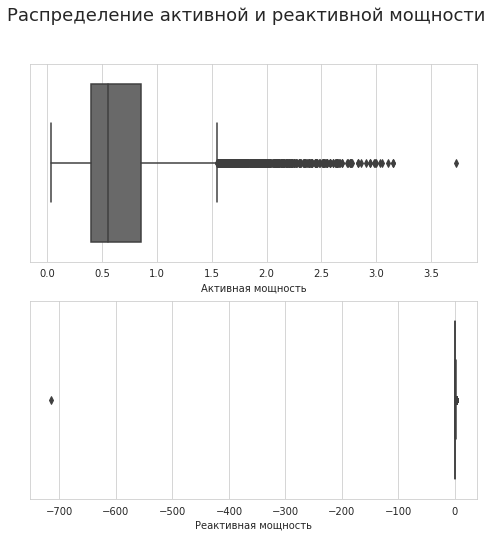

In [7]:
fig, axes = plt.subplots(2,1, figsize=(8,8))

sns.boxplot(df_arc['Активная мощность'], color='dimgray', ax=axes[0])
sns.boxplot(df_arc['Реактивная мощность'], color='dimgray', ax=axes[1])

plt.suptitle('Распределение активной и реактивной мощности', size=18);

В каждом столбце есть по одному значимому выбросу. Уберем их, остальные оставим.

In [8]:
df_arc['Активная мощность'].sort_values(ascending=False)

7799     3.731596
9226     3.156276
12424    3.150762
9870     3.107820
14200    3.052813
           ...   
4914     0.031630
2419     0.030563
5320     0.030190
5596     0.030188
7372     0.030002
Name: Активная мощность, Length: 14876, dtype: float64

In [9]:
df_arc['Реактивная мощность'].sort_values()

9780    -715.504924
5596       0.020806
2419       0.021154
4914       0.022485
4633       0.022983
            ...    
13760      2.335088
12424      2.397032
9361       2.459959
9226       2.504206
7799       2.676388
Name: Реактивная мощность, Length: 14876, dtype: float64

Нас интересуют строки 7799 и 9780. Хотя значение активной мощности в 3,7 условные единицы может горовить о долгом и тяжелом процессе плавки.

In [10]:
df_arc.loc[7799]

key                                    1689
Начало нагрева дугой    2019-07-02 18:49:03
Конец нагрева дугой     2019-07-02 19:04:10
Активная мощность                    3.7316
Реактивная мощность                 2.67639
Name: 7799, dtype: object

Присутствует большое наение реактивной мощности, нагрев продолжался 15 минут. Возможно, это нормальное значение.

In [11]:
df_arc.loc[9780]

key                                    2116
Начало нагрева дугой    2019-07-24 00:44:48
Конец нагрева дугой     2019-07-24 00:46:37
Активная мощность                  0.495782
Реактивная мощность                -715.505
Name: 9780, dtype: object

А вот это значение похоже на сбой системы. Можно посмотреть, какая реактивная мощность была у электродов при подобном уровне активной мощности.  
Но сначала взгляем, если зависимость активной мощности от реактивной.

In [12]:
temp = df_arc.drop(9780)

temp['Активная мощность'].corr(df_arc['Реактивная мощность'])

0.9631819131519803

Без выброса заметна практически полная корреляция двух признаков. Можно применить среднее значение реактивной мощности при определенном уровне активной.  

И это правильный вывод на основании [этой статьи из Википедии](https://ru.wikipedia.org/wiki/%D0%AD%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D1%89%D0%BD%D0%BE%D1%81%D1%82%D1%8C#%D0%A0%D0%B5%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D1%89%D0%BD%D0%BE%D1%81%D1%82%D1%8C).

Мы так же можем найти полную мощность по формуле: 

$$S=\sqrt{P^2+Q^2}\$$

где S - полная мощность, P - активная мощность, Q - реактивная мощность.

In [13]:
temp['coef'] = temp['Активная мощность'] / temp['Реактивная мощность']

print('Коэффициент корреляции между признаками =', temp['coef'].median())

Коэффициент корреляции между признаками = 1.3760902550472336


В среднем реактивная мощность в 1,376 раз меньше активной.  
Найдем новое значение неправильной реактивной мощности.

In [14]:
df_arc_upd = df_arc.copy()

upd_value = df_arc_upd.loc[9780, 'Активная мощность'] / 1.376

df_arc_upd.loc[9780, 'Реактивная мощность'] = upd_value

df_arc_upd.loc[9780]

key                                    2116
Начало нагрева дугой    2019-07-24 00:44:48
Конец нагрева дугой     2019-07-24 00:46:37
Активная мощность                  0.495782
Реактивная мощность                0.360307
Name: 9780, dtype: object

Отлично. 

Далее работаем с датасетом df_arc_upd.  

Проверим значения Активной мощности.

In [15]:
print('Рассчетное значение активной мощности ', df_arc.loc[7799,'Реактивная мощность'] * 1.376)
print('Реальное значение активной мощности', df_arc.loc[7799,'Активная мощность'])

Рассчетное значение активной мощности  3.6827092665984
Реальное значение активной мощности 3.7315961123


Разница составляет ~0.05, ошибки измерений нет. Пока не будет удалять это значение.

Посмотрим на распределения без выброса.

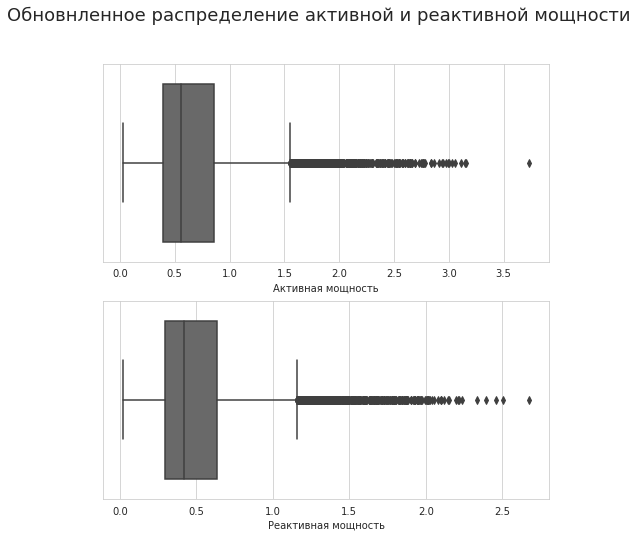

In [16]:
fig, axes = plt.subplots(2,1, figsize=(8,8))

sns.boxplot(df_arc_upd['Активная мощность'], color='dimgray', ax=axes[0])
sns.boxplot(df_arc_upd['Реактивная мощность'], color='dimgray', ax=axes[1])

plt.suptitle('Обновнленное распределение активной и реактивной мощности', size=18);

Заметны выбросы в правой части графиков. Пока не удаляем их, посмотрим на работу финальной модели.

Рассчитаем полную мощность.

In [17]:
temp = df_arc.copy()
temp = temp.drop(9780)
temp['Полная мощность'] = np.sqrt(temp['Активная мощность']**2 + temp['Реактивная мощность']**2) 

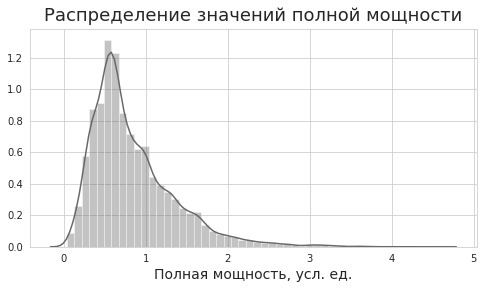

In [18]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,4))

sns.distplot(temp['Полная мощность'], color='dimgrey')

plt.xlabel('Полная мощность, усл. ед.', size=14)
plt.title('Распределение значений полной мощности', size=18, y=1.01);

Виден длинный правый хвост. Больщая часть значений находится в диапазоне 0,6. 
Посмотрим на выбросы.

In [19]:
temp.loc[temp['Полная мощность'] >= 3]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность
94,21,2019-05-04 03:34:47,2019-05-04 03:44:45,2.629083,1.691524,3.126233
198,44,2019-05-05 00:36:13,2019-05-05 00:46:45,2.343373,1.921817,3.030639
239,51,2019-05-05 05:49:45,2019-05-05 05:59:56,2.772319,1.872731,3.345575
405,88,2019-05-06 11:28:20,2019-05-06 11:37:21,2.551536,1.861429,3.158363
541,118,2019-05-07 18:37:31,2019-05-07 18:48:08,2.375788,1.917851,3.053280
...,...,...,...,...,...,...
13664,2964,2019-08-23 01:02:24,2019-08-23 01:12:20,2.834900,1.833726,3.376271
13760,2985,2019-08-23 19:03:07,2019-08-23 19:14:14,2.779279,2.335088,3.630018
14181,3082,2019-08-27 01:22:31,2019-08-27 01:32:02,2.500275,1.683092,3.013997
14200,3086,2019-08-27 03:41:09,2019-08-27 03:53:10,3.052813,2.216230,3.772445


73 значения полной мощности > 3 мегаватт(условно). Уточним информацию у инженеров.

---

Проверим, какие записи об обработке отсутсвуют.

In [20]:
keys_values = df_arc['key'].unique()
print('Всего {} операций'.format(len(keys_values)))

Всего 3214 операций


При этом у нас по ключам 3241 операция. 

Найдем пропущенные значения.

In [21]:
missing_keys = []

for i in range(len(keys_values)-1):
    
    if keys_values[i] == keys_values[i+1] - 1:
        continue
    else:
        key = keys_values[i]+1
        missing_keys.append(key)

In [22]:
missing_keys, len(missing_keys)

([41,
  195,
  279,
  355,
  382,
  506,
  529,
  540,
  607,
  683,
  710,
  766,
  1133,
  1300,
  1437,
  2031,
  2103,
  2278,
  2356,
  2373,
  2446,
  2469,
  2491,
  2683,
  3200,
  3207],
 26)

In [23]:
for i in missing_keys:
    display(df_arc.loc[df_arc['key'] == i+1])

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
913,196,2019-05-10 15:05:11,2019-05-10 15:07:42,0.531242,0.388698
914,196,2019-05-10 15:38:47,2019-05-10 15:40:10,0.354862,0.231908
915,196,2019-05-10 15:40:46,2019-05-10 15:42:05,0.354461,0.240250


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
1273,280,2019-05-13 23:16:51,2019-05-13 23:19:30,0.531808,0.432575
1274,280,2019-05-13 23:24:09,2019-05-13 23:26:34,0.629088,0.397341
1275,280,2019-05-13 23:28:08,2019-05-13 23:33:10,1.380310,0.767380
1276,280,2019-05-13 23:34:16,2019-05-13 23:39:29,1.468543,0.809540
1277,280,2019-05-13 23:41:57,2019-05-13 23:44:16,0.618050,0.365958
1278,280,2019-05-13 23:45:50,2019-05-13 23:50:26,1.174957,0.716081
1279,280,2019-05-13 23:53:05,2019-05-13 23:55:05,0.507910,0.307163
1280,280,2019-05-13 23:56:57,2019-05-14 00:01:43,1.197192,0.728587
1281,280,2019-05-14 00:05:53,2019-05-14 00:07:00,0.282393,0.170042


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
1652,356,2019-05-16 18:59:38,2019-05-16 19:01:42,0.451559,0.374456
1653,356,2019-05-16 19:08:26,2019-05-16 19:13:36,1.285364,0.979460
1654,356,2019-05-16 19:19:36,2019-05-16 19:24:38,1.309269,0.941132
1655,356,2019-05-16 19:32:43,2019-05-16 19:36:34,1.015459,0.698430


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
1768,383,2019-05-17 18:48:00,2019-05-17 18:50:25,0.557739,0.406088
1769,383,2019-05-17 18:54:32,2019-05-17 18:56:25,0.434578,0.350117
1770,383,2019-05-17 19:01:18,2019-05-17 19:02:26,0.266819,0.202137
1771,383,2019-05-17 19:24:13,2019-05-17 19:26:31,0.623035,0.408613


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
2355,507,2019-05-22 07:08:12,2019-05-22 07:10:29,0.532599,0.389240
2356,507,2019-05-22 07:14:51,2019-05-22 07:17:50,0.697734,0.567233
2357,507,2019-05-22 07:19:14,2019-05-22 07:24:27,1.390591,0.965243
2358,507,2019-05-22 07:27:11,2019-05-22 07:33:34,1.745092,1.144200
2359,507,2019-05-22 08:17:20,2019-05-22 08:21:16,1.064305,0.701169
2360,507,2019-05-22 08:23:17,2019-05-22 08:27:19,1.060903,0.698771
2361,507,2019-05-22 08:34:57,2019-05-22 08:36:39,0.453759,0.299649


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
2456,530,2019-05-22 22:48:30,2019-05-22 22:52:31,0.866785,0.697797


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
2494,541,2019-05-23 08:14:26,2019-05-23 08:17:43,0.696466,0.506860
2495,541,2019-05-23 08:20:55,2019-05-23 08:25:27,0.895490,0.737648
2496,541,2019-05-23 08:28:42,2019-05-23 08:31:49,0.705720,0.499061
2497,541,2019-05-23 08:42:07,2019-05-23 08:44:58,0.720513,0.479535
2498,541,2019-05-23 08:59:29,2019-05-23 09:01:07,0.440914,0.293281


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
2795,608,2019-05-25 18:34:59,2019-05-25 18:37:00,0.373422,0.282934
2796,608,2019-05-25 18:39:32,2019-05-25 18:44:45,1.030622,0.843950
2797,608,2019-05-25 18:47:24,2019-05-25 18:48:28,0.227790,0.166905
2798,608,2019-05-25 18:52:25,2019-05-25 18:56:37,0.852898,0.796612


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
3151,684,2019-05-28 15:27:56,2019-05-28 15:32:06,0.973453,0.825564
3152,684,2019-05-28 15:33:17,2019-05-28 15:35:05,0.429088,0.372028
3153,684,2019-05-28 15:36:10,2019-05-28 15:39:08,0.802865,0.570025
3154,684,2019-05-28 15:41:03,2019-05-28 15:46:21,1.517004,0.925427
3155,684,2019-05-28 15:47:47,2019-05-28 15:53:10,1.515680,0.944811
3156,684,2019-05-28 15:55:45,2019-05-28 15:57:52,0.597258,0.369133


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
3288,711,2019-05-29 18:06:07,2019-05-29 18:08:26,0.449686,0.356106
3289,711,2019-05-29 18:09:36,2019-05-29 18:12:18,0.645819,0.479464
3290,711,2019-05-29 18:13:47,2019-05-29 18:17:51,1.029058,0.753656
3291,711,2019-05-29 18:19:56,2019-05-29 18:24:43,1.222942,0.867077


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
3536,767,2019-05-31 23:26:32,2019-05-31 23:29:03,0.503979,0.378955
3537,767,2019-05-31 23:32:46,2019-05-31 23:35:31,0.550453,0.465964
3538,767,2019-05-31 23:50:13,2019-05-31 23:52:11,0.507567,0.336815


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
5224,1134,2019-06-13 13:22:58,2019-06-13 13:25:06,0.503174,0.374759
5225,1134,2019-06-13 13:30:49,2019-06-13 13:32:34,0.403382,0.311169
5226,1134,2019-06-13 13:38:27,2019-06-13 13:40:39,0.560723,0.396547
5227,1134,2019-06-13 13:46:09,2019-06-13 13:50:16,1.075202,0.756505
5228,1134,2019-06-13 13:59:41,2019-06-13 14:02:20,0.692613,0.477658
5229,1134,2019-06-13 14:06:03,2019-06-13 14:06:54,0.213226,0.147038


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
5969,1301,2019-06-19 06:51:46,2019-06-19 06:53:29,0.360470,0.266430
5970,1301,2019-06-19 06:55:28,2019-06-19 06:59:39,1.072808,0.815253
5971,1301,2019-06-19 07:23:56,2019-06-19 07:24:58,0.271999,0.194674
5972,1301,2019-06-19 07:26:10,2019-06-19 07:28:50,0.714998,0.489924
5973,1301,2019-06-19 07:30:40,2019-06-19 07:34:36,1.043104,0.712758


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
6607,1438,2019-06-24 02:27:44,2019-06-24 02:29:50,0.363184,0.583708
6608,1438,2019-06-24 02:40:15,2019-06-24 02:43:23,0.779512,0.774157
6609,1438,2019-06-24 02:58:15,2019-06-24 03:00:02,0.407010,0.473591
6610,1438,2019-06-24 03:03:26,2019-06-24 03:09:42,1.657588,1.347631
6611,1438,2019-06-24 03:13:08,2019-06-24 03:16:20,0.810655,0.683794
6612,1438,2019-06-24 03:18:07,2019-06-24 03:19:32,0.364829,0.315143


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9370,2032,2019-07-20 21:51:38,2019-07-20 21:53:50,0.453800,0.328750
9371,2032,2019-07-20 22:08:44,2019-07-20 22:11:02,0.537712,0.459403
9372,2032,2019-07-20 22:30:50,2019-07-20 22:32:22,0.354215,0.272609


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9702,2104,2019-07-23 08:12:38,2019-07-23 08:15:23,0.578512,0.426996
9703,2104,2019-07-23 08:25:15,2019-07-23 08:29:59,1.277633,0.883057
9704,2104,2019-07-23 08:45:01,2019-07-23 08:48:02,0.807341,0.576806
9705,2104,2019-07-23 08:52:28,2019-07-23 08:52:59,0.121445,0.085203
9706,2104,2019-07-23 08:54:59,2019-07-23 09:00:06,1.329247,0.980762
9707,2104,2019-07-23 09:11:12,2019-07-23 09:14:10,0.794798,0.576204
9708,2104,2019-07-23 09:16:31,2019-07-23 09:16:49,0.064994,0.046329
9709,2104,2019-07-23 09:17:27,2019-07-23 09:18:51,0.366758,0.280175


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
10481,2279,2019-07-29 04:20:25,2019-07-29 04:22:44,0.483324,0.351886
10482,2279,2019-07-29 04:27:15,2019-07-29 04:30:16,0.440148,0.418907
10483,2279,2019-07-29 04:49:24,2019-07-29 04:51:11,0.380086,0.249555
10484,2279,2019-07-29 04:53:19,2019-07-29 04:55:27,0.441830,0.304518
10485,2279,2019-07-29 04:57:01,2019-07-29 04:58:14,0.256547,0.165236
10486,2279,2019-07-29 04:59:06,2019-07-29 05:00:33,0.306803,0.193483


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
10831,2357,2019-07-31 20:48:09,2019-07-31 20:50:06,0.415543,0.291163
10832,2357,2019-07-31 20:54:27,2019-07-31 20:57:32,0.635020,0.529055
10833,2357,2019-07-31 21:11:19,2019-07-31 21:14:22,0.793427,0.606518


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
10902,2374,2019-08-01 19:44:14,2019-08-01 19:46:28,0.460998,0.354677
10903,2374,2019-08-01 19:49:49,2019-08-01 19:52:45,0.750640,0.595272
10904,2374,2019-08-01 19:57:00,2019-08-01 20:00:20,0.907836,0.639066
10905,2374,2019-08-01 20:03:54,2019-08-01 20:06:33,0.632872,0.465624


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
11233,2447,2019-08-04 04:53:46,2019-08-04 04:55:47,0.407968,0.298258
11234,2447,2019-08-04 05:02:55,2019-08-04 05:06:03,0.650231,0.579873
11235,2447,2019-08-04 05:29:04,2019-08-04 05:31:20,0.604442,0.404065


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
11329,2470,2019-08-05 00:57:53,2019-08-05 01:00:52,0.613309,0.475254
11330,2470,2019-08-05 01:07:49,2019-08-05 01:11:34,0.749570,0.631038
11331,2470,2019-08-05 01:29:38,2019-08-05 01:30:52,0.244753,0.182578


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
11418,2492,2019-08-05 22:37:53,2019-08-05 22:40:01,0.451012,0.340561
11419,2492,2019-08-05 22:49:38,2019-08-05 22:55:57,1.336915,1.078713
11420,2492,2019-08-05 23:05:44,2019-08-05 23:08:39,0.783357,0.514980


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
12350,2684,2019-08-12 14:49:17,2019-08-12 14:51:28,0.453418,0.330635
12351,2684,2019-08-12 15:04:58,2019-08-12 15:06:46,0.373135,0.280805
12352,2684,2019-08-12 15:19:07,2019-08-12 15:21:46,0.626338,0.484421
12353,2684,2019-08-12 15:30:03,2019-08-12 15:32:52,0.730190,0.494385
12354,2684,2019-08-12 15:33:47,2019-08-12 15:35:30,0.440583,0.286786


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14704,3201,2019-08-30 21:42:25,2019-08-30 21:44:29,0.415246,0.327720
14705,3201,2019-08-30 21:49:03,2019-08-30 21:52:03,0.646498,0.489845
14706,3201,2019-08-30 21:53:50,2019-08-30 21:54:51,0.211817,0.164495
14707,3201,2019-08-30 22:08:29,2019-08-30 22:11:02,0.673396,0.473263
14708,3201,2019-08-30 22:13:32,2019-08-30 22:15:53,0.645816,0.437943


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14732,3208,2019-08-31 01:47:35,2019-08-31 01:49:49,0.448066,0.311453
14733,3208,2019-08-31 01:50:42,2019-08-31 01:56:59,1.520766,1.133155
14734,3208,2019-08-31 01:58:39,2019-08-31 02:01:23,0.749844,0.514677
14735,3208,2019-08-31 02:02:24,2019-08-31 02:08:38,1.700265,1.179449


In [24]:
missing_keys.append(42)
len(missing_keys)

27

Так же у нас отсутсвует запись со значением key = 42. Это никак не влияет на построение финальной модели, просто игнорируем данные.

---

#### Сыпучие материалы

In [25]:
df_info(df_bulk)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null float64
Bulk 2     22 non-null float64
Bulk 3     1298 non-null float64
Bulk 4     1014 non-null float64
Bulk 5     77 non-null float64
Bulk 6     576 non-null float64
Bulk 7     25 non-null float64
Bulk 8     1 non-null float64
Bulk 9     19 non-null float64
Bulk 10    176 non-null float64
Bulk 11    177 non-null float64
Bulk 12    2450 non-null float64
Bulk 13    18 non-null float64
Bulk 14    2806 non-null float64
Bulk 15    2248 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     0
Bulk 8     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64

In [26]:
df_bulk.tail()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,52.0


Перед нами данные о добавлении сыпучих масс в процессе легирования стали. 

Если я правильно понимаю - 15 столбцов, это 15 различных добавок. 
Если моя теория верна, больше всего добавляют сыпучих материалов под номерами: 14, 15, 12, 3, 4. 
Меньше всего добавок под номерами 8,2,7.  

Посмотрим на выбросы.

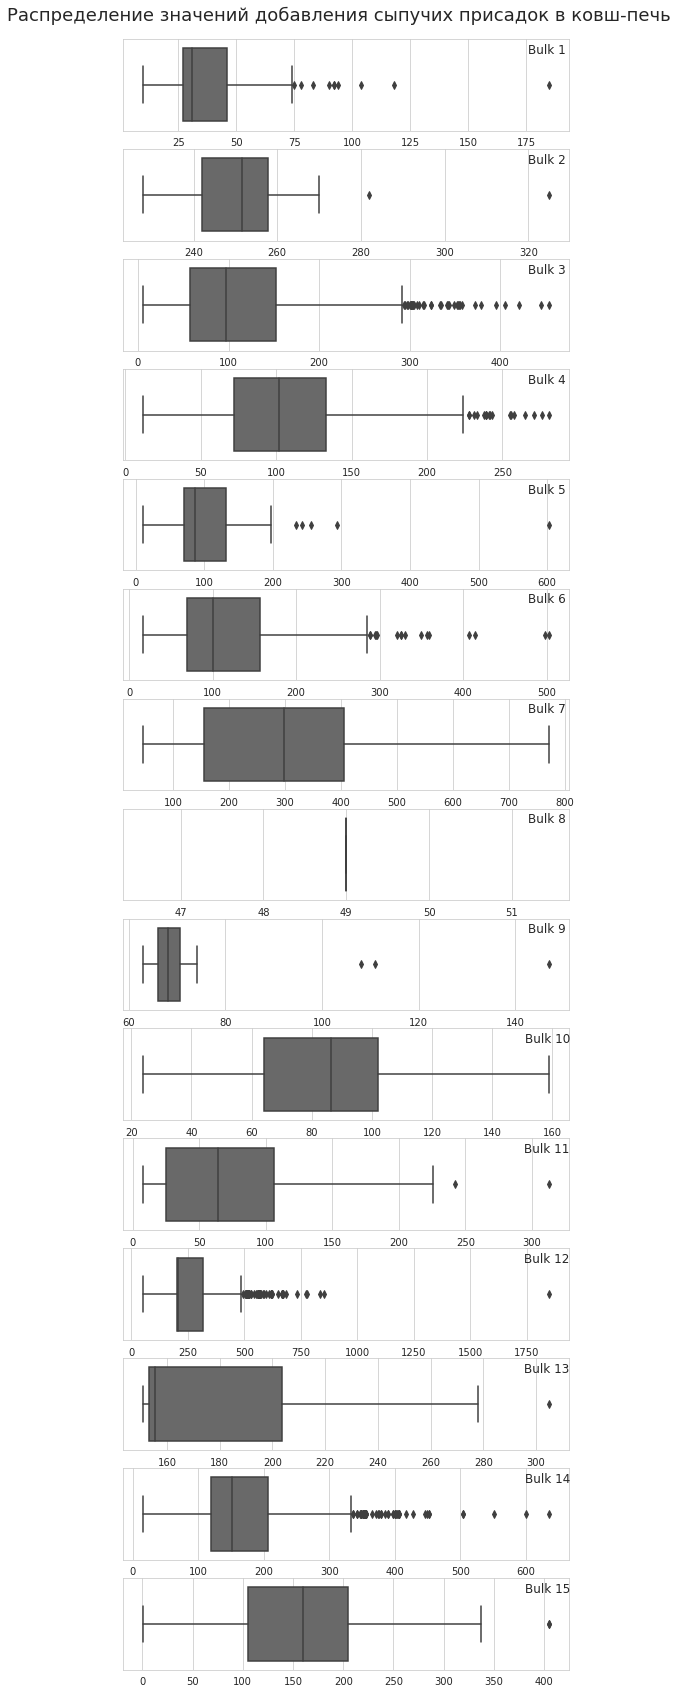

In [27]:
fig, axes = plt.subplots(15,1, figsize=(8,30))

for i, j in zip(df_bulk.columns[1:], range(df_bulk.shape[1]+1)):
                    sns.boxplot(df_bulk[i], color='dimgray', ax=axes[j])
                    axes[j].set_title(i, x=0.95, y=0.78, size=12)

axes[14].set_xlabel('')

plt.suptitle('Распределение значений добавления сыпучих присадок в ковш-печь', size=18, y=0.895);

В каждом bulk'e есть один очень большой правый выброс. Это произошно в одной партии сырья?

In [28]:
df_bulk['Bulk 1'].sort_values(ascending=False)

303     185.0
2423    118.0
2840    104.0
291      94.0
206      92.0
        ...  
3124      NaN
3125      NaN
3126      NaN
3127      NaN
3128      NaN
Name: Bulk 1, Length: 3129, dtype: float64

In [29]:
df_bulk['Bulk 5'].sort_values(ascending=False)

1747    603.0
1991    293.0
1995    256.0
1992    242.0
2206    234.0
        ...  
3124      NaN
3125      NaN
3126      NaN
3127      NaN
3128      NaN
Name: Bulk 5, Length: 3129, dtype: float64

Нет, выбросы наблюдаются в разных партиях. Вероятно, это особенность технологического процесса. Пока предлагаю не удалять эти данные. Посмотрив в дальнейшем, как они коррелируют с температурой.

---

#### Время подачи сыпучих материалов

In [30]:
df_info(df_bulk_time)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null object
Bulk 2     22 non-null object
Bulk 3     1298 non-null object
Bulk 4     1014 non-null object
Bulk 5     77 non-null object
Bulk 6     576 non-null object
Bulk 7     25 non-null object
Bulk 8     1 non-null object
Bulk 9     19 non-null object
Bulk 10    176 non-null object
Bulk 11    177 non-null object
Bulk 12    2450 non-null object
Bulk 13    18 non-null object
Bulk 14    2806 non-null object
Bulk 15    2248 non-null object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     0
Bulk 8     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64

Данные о времени ввода сыпучих веществ в ковш. 

Пропуски - в ковш не добавляли ничего. Пропуски соответсвуют данным из df_bulk.  
Добавки вводятся в металл разными партиями. Несколько добавок может быть введено в одих заход, например, 12,14,15. 

*UPD*

Эта таблица не поможет нам с рассчетами и ее можно не обрабатывать.

---

#### Продувка сплава газом

In [31]:
df_info(df_gas)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
key      3239 non-null int64
Газ 1    3239 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


key      0
Газ 1    0
dtype: int64

Информация о продувке инертным газом расплавленного металла.  
3239 записей. Две записи потеряно или продувка не проводилась?  

По идее, количество газа влияет на энергозатраты. Логично предположить, что снижение количества газа приведет к снижению энергозартат.  

Посмотрим на дистрибуцию данных.

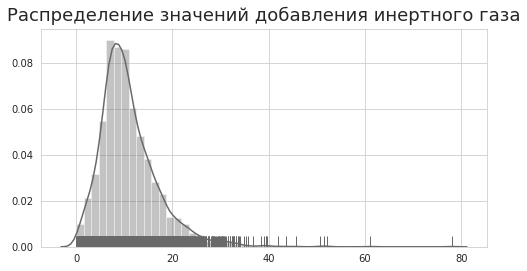

In [32]:
plt.figure(figsize=(8,4))
sns.distplot(df_gas['Газ 1'], rug=True, color='dimgray')
plt.xlabel('')
plt.title('Распределение значений добавления инертного газа', size=18, y=1.01);

Замечено несколько выбивающихся значений. Пока оставлю их без изменений. Уточню у тимлида.

*UPD*  

Пока не удаляем выбросы, возможно, это особенности технологического процесса.

---

#### Температура

Самая главная таблица. Из нее мы достанем начальную температуру, как признак, и финальную температуру, как целевой признак. Сделаю это на этапе предобработки.

In [33]:
df_info(df_temp)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null object
Температура     13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


key             0
Время замера    0
Температура     0
dtype: int64

Анализ температуры.  

15907 записей. Пропусков и дубликатов не обнаружено.  

Записей измерения температуры на 1031 больше. Обратимся к тимлиду.

Распределения температуры представлено ниже.

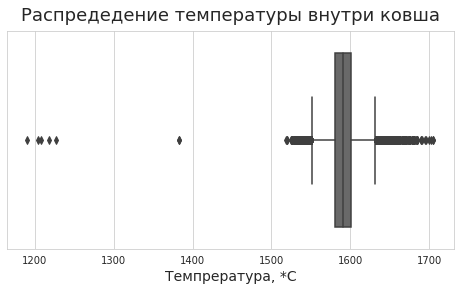

In [34]:
plt.figure(figsize=(8,4))

sns.boxplot(df_temp['Температура'], color='dimgray')

plt.xlabel('Темпрература, *С', size=14)
plt.title('Распредедение температуры внутри ковша', size=18, y=1.02);

Заметно большое количество значений существенно ниже средней температуры в рабочей камере. Посмотрим, сколько всего таких значений.

In [35]:
temp = df_temp.loc[df_temp['Температура'] <= 1500]

temp.shape

(7, 3)

В 7 случая температура была ниже 1500* С. Сбой технологического процесса или ошибка техники? 

Посмотрим на среднее изменение температуры металла в каждой партии.

In [36]:
temp_min = pd.DataFrame(df_temp.groupby('key')['Температура'].min().reset_index())
temp_max = pd.DataFrame(df_temp.groupby('key')['Температура'].max().reset_index())

temp_diff = temp_min.join(temp_max['Температура'], lsuffix='_min', rsuffix='_max')

temp_diff['Разница'] = temp_diff['Температура_max'] - temp_diff['Температура_min']

temp_diff

,key,Температура_min,Температура_max,Разница
0,1,1571.0,1618.0,47.0
1,2,1577.0,1608.0,31.0
2,3,1596.0,1599.0,3.0
3,4,1601.0,1625.0,24.0
4,5,1576.0,1602.0,26.0
...,...,...,...,...
3211,3237,1569.0,1569.0,0.0
3212,3238,1584.0,1584.0,0.0
3213,3239,1598.0,1598.0,0.0
3214,3240,1617.0,1617.0,0.0


Интересно, что в некоторых случаях температура не изменилась. Или с данными что-то случилось.

In [37]:
df_temp.tail(20)

,key,Время замера,Температура
15887,3239,2019-09-01 01:42:46,NaN
15888,3239,2019-09-01 01:48:00,NaN
15889,3239,2019-09-01 01:59:27,NaN
15890,3239,2019-09-01 02:13:30,NaN
15891,3239,2019-09-01 02:22:15,NaN
15892,3239,2019-09-01 02:23:02,NaN
15893,3239,2019-09-01 02:24:15,NaN
15894,3240,2019-09-01 02:39:01,1617.0
15895,3240,2019-09-01 02:48:33,NaN
15896,3240,2019-09-01 03:03:21,NaN


На последних этапах отсутсвуют измерения финальной температуры, это норма. 

Дропнем эти данные и посмотрим на распределение изменений температуры.

In [38]:
temp_diff_dropped = temp_diff.drop(temp_diff.loc[temp_diff['Разница'] == 0.0].index)
temp_diff_dropped

,key,Температура_min,Температура_max,Разница
0,1,1571.0,1618.0,47.0
1,2,1577.0,1608.0,31.0
2,3,1596.0,1599.0,3.0
3,4,1601.0,1625.0,24.0
4,5,1576.0,1602.0,26.0
...,...,...,...,...
2472,2495,1570.0,1591.0,21.0
2473,2496,1554.0,1595.0,41.0
2474,2497,1571.0,1589.0,18.0
2475,2498,1570.0,1594.0,24.0


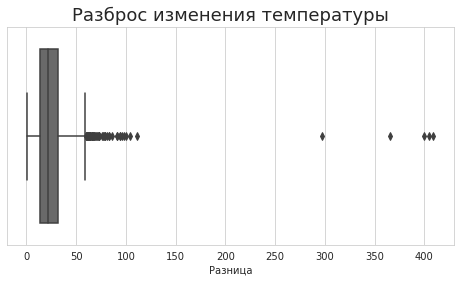

In [39]:
plt.figure(figsize=(8,4))

sns.boxplot(temp_diff_dropped['Разница'], color='dimgray')

plt.title('Разброс изменения температуры', size=18);

5 значений более 280 градусов. Представляю, сколько дополнительной энергии пришлось потратить на нагрев 100 тонн металла до такой температуры

In [40]:
temp_diff_dropped['Разница'].describe()

count    2472.000000
mean       25.250405
std        21.392423
min         1.000000
25%        14.000000
50%        22.000000
75%        32.000000
max       409.000000
Name: Разница, dtype: float64

In [41]:
temp_diff_dropped[temp_diff_dropped['Разница'] > 280]

,key,Температура_min,Температура_max,Разница
855,867,1191.0,1600.0,409.0
1201,1214,1208.0,1608.0,400.0
1604,1619,1218.0,1623.0,405.0
1803,1818,1383.0,1680.0,297.0
2036,2052,1227.0,1592.0,365.0


In [42]:
df_arc_upd.query('key == 855')

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
3964,855,2019-06-04 04:45:08,2019-06-04 04:48:28,0.719421,0.503366
3965,855,2019-06-04 04:50:20,2019-06-04 04:55:23,1.339811,0.916953
3966,855,2019-06-04 04:57:08,2019-06-04 05:02:11,1.380818,0.904184
3967,855,2019-06-04 05:12:11,2019-06-04 05:16:25,1.159729,0.757817
3968,855,2019-06-04 05:49:52,2019-06-04 05:51:59,0.574747,0.386966
3969,855,2019-06-04 05:53:00,2019-06-04 05:55:06,0.569060,0.374547


6 циклов нагрева общей длительностью более часа. 

In [43]:
df_bulk.query('key == 855')

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
820,855,NaN,NaN,72.0,NaN,NaN,155.0,NaN,NaN,NaN,NaN,139.0,204.0,NaN,150.0,200.0


Много добавок введено.  

Пока НЕ УДАЛЯЕМ эти выбросы. Посмотрим, как они будут влиять на модель.

---

#### Проволочные материалы

In [44]:
df_info(df_wire)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null float64
Wire 2    1079 non-null float64
Wire 3    63 non-null float64
Wire 4    14 non-null float64
Wire 5    1 non-null float64
Wire 6    73 non-null float64
Wire 7    11 non-null float64
Wire 8    19 non-null float64
Wire 9    29 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060484,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


key       0
Wire 1    0
Wire 2    0
Wire 3    0
Wire 4    0
Wire 5    0
Wire 6    0
Wire 7    0
Wire 8    0
Wire 9    0
dtype: int64

In [45]:
df_wire.loc[df_wire['Wire 1'].isna()]

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
98,114,NaN,NaN,88.648567,43.065361,NaN,54.122643,NaN,NaN,NaN
99,115,NaN,NaN,NaN,NaN,NaN,64.212723,NaN,NaN,NaN
101,117,NaN,NaN,93.068977,NaN,NaN,26.975523,NaN,NaN,NaN
102,118,NaN,NaN,94.990898,33.182243,NaN,60.025684,NaN,NaN,NaN
103,119,NaN,NaN,93.117027,NaN,NaN,43.174561,NaN,NaN,NaN
116,132,NaN,NaN,NaN,NaN,NaN,28.108082,NaN,NaN,NaN
118,134,NaN,NaN,NaN,NaN,NaN,26.151842,NaN,NaN,NaN
299,322,NaN,188.228550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,504,NaN,23.193039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,530,NaN,22.107281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В расплавленный металл могут подавать 9 различных проволочных материалов.   
В основном в ход идут образцы 1 и 2. 
В каждую партию металла добавляли хотя бы одну проволоку. 

Необходимо установить зависимости этого признака на ключевую метрику. 

---


### Время подачи проволоки

In [46]:
df_info(df_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null object
Wire 2    1079 non-null object
Wire 3    63 non-null object
Wire 4    14 non-null object
Wire 5    1 non-null object
Wire 6    73 non-null object
Wire 7    11 non-null object
Wire 8    19 non-null object
Wire 9    29 non-null object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


key       0
Wire 1    0
Wire 2    0
Wire 3    0
Wire 4    0
Wire 5    0
Wire 6    0
Wire 7    0
Wire 8    0
Wire 9    0
dtype: int64

Пропуски и особенности при первом приближении не обнаружены. 

Вероятно, эти данные нам понядобятся для вычисления температуры. 

*UPD*

Действительно, эта таблица не поможет нам с рассчетами и ее можно не обрабатывать.

---

Анализ данных завершен, переходим к третьему шагу.

---

## Шаг 3. План работы <a class='anchor' id='02'></a>

#### Примерный план работы :

**1. Предобработка данных**  
Перевод даты в datetime формат, обработка выбросов (Реактивная мощность, сыпучие вещества, инетный газ), заполнение пропусков при необходимости).
Решить вопрос о недостающих данных после общения с Тимлидом (найти, удалить, заполнить)  

**2. Подбор необходимых фич**  
Нужны ли нам все столбцы Bulk и Wire, В бОльшую часть сплавов добавляют лишь некоторые. Необходимо определиться с группировкой по времени - нужна ли она.

**3. Объединение данных в одну таблицу**  
Выделение целевого и учебных признаков. Скалирование данных при необходимости.

**4. Подбор и обучение моделей**   
Тестирование дамми болванки, деление сета на 3 выборки, подбор гиперпараметров и валидация моделей.

**5. Выбор и тестирование финальной модели**  
Проверка модели на тестовой выборке. Описание результатов.

### Вопросы 

**Общие вопросы:**

1. Отсутсвуют записи о 27 процессах обработки. Возможно ли их восстановить или получить? Нужно ли это для полной картины исследования?
2. Целевой признак исследования - температура на каждом этапе? Получается, мы ищем закономерности влияния всех этапов технологического процесса на температуру?
3. В ранних данных температуру измеряли на каждом этапе, на последних этапах - только единичные измерения. Это может сильно испортить общую картину. Можно ли найти недостающие данные? 
4. Хочется сгруппировать данные по key, но ведь это неверный подход? Нам интересно найти температуру на каждом этапе нагрева.

**Частные вопросы :**
1. В каких единицах выражена мощность? КВт/ч? 
2. Замечены 73 выброса в значениях Полной мощности (значение больше 3). Вопрос инженерам - это норма?
3. Есть выброс в Реактивной мощности = -715. Можно заменить медианой по диапазону активной мощности.
4. От чего зависит добавление сыпучих веществ в расплавленный металл. 15 столбцов - это 15 возможных добавок? Пропущенные значения в таблице data_bulk - ничего не добавляли или нет данных? 
5. О работе электродов есть 3241 запись, о добавлении сыпучих веществ 3129 (data_bulk, data_bulk_time). Однако, с индексами все впорядке (3241). 112 раз ничего не добавляли в металл или записи утеряны?  
6. Данных о продувке 3239 (data_gas). Две записи утеряно или продувка не проводилась?  
7. Данные о продувке - это объем газа? 
8. В добавлении инертного газа есть заметные выбросы (до 77 единиц). Вопрос к инженерам: это допустимые значения?
9. Данных о записях температуры на 1031 больше, чем записей о работе электродов. В какие моменты дополнительно проводился замер температуры?   
10. В данных температуры замечено 7 выбивающихся низких значений. Это норма или ошибка измерений?  
11. В последних партиях нагрев проводился стандартно несколько раз. Добавки и измерение температуры проводились, судя по записям, только один раз. Изменение технологического процесса или потеря данных?  
12. Вопрос о целесообразности данных о времени закладки проволоки.   

---

## Шаг 4. Предобработка данных <a class = 'anchor' id='0400'></a>

### Пропуски, выбросы, ненужные строки, замена типа данных <a class='anchor' id='0410'></a> 

Выброс реактивной мощности исправлен на шаге анализа данных. 
БОльшую часть выбросов и аномальных значений при первом прогоне я не буду изменять. Я принял это решение, потому что не заметил выбросов, связанных с ошибками вычичления. Менять или выбрасывать реальные данные считаю неверным (при первом приближении).

#### Таблица с инертным газом  

Переименуем столбец Газ 1 в английский эквивалент.

In [47]:
df_gas = df_gas.rename(columns={'Газ 1':'gas_amount'})
df_gas.head(2)

,key,gas_amount
0,1,29.749986
1,2,12.555561


Двигаемся дальше.

---

#### Время 

Переведем время из object в datetime во всех таблицах. Не важно, будем ли мы их использовать в дальнейшем или нет.  
Напишем функцию для автоматизации. Применим ее к необходимым столбцам.

In [48]:
def datetime(df, column):
    
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%dT%H:%M:%S')

In [49]:
datetime(df_arc_upd, 'Начало нагрева дугой')
datetime(df_arc_upd, 'Конец нагрева дугой')
datetime(df_temp, 'Время замера')

for i in df_bulk_time.columns[1:]:
    datetime(df_bulk_time, i)

for i in df_wire_time.columns[1:]:
    datetime(df_wire_time, i)

In [50]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null datetime64[ns]
Температура     13006 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


Хорошо, двигаемся дальше. 

---

#### Температура

Необходимо оставить только те key, у которых есть первичная и конечная температуры. Убираем все партии, о которых есть только одна запись.

In [51]:
temp = df_temp.groupby('key')['Температура'].count().reset_index()
temp['Температура'].value_counts()

1     741
4     650
5     585
3     432
6     370
7     182
8     100
2      56
9      43
10     21
11     16
12     12
16      4
15      2
13      1
14      1
Name: Температура, dtype: int64

741 партия имеет только 1 замер температуры. Теряем как минимум 23% исходных данных.

In [52]:
temp_once = temp.loc[temp['Температура'] == 1,'key']
temp_once

192      195
276      279
2477    2500
2478    2501
2479    2502
        ... 
3211    3237
3212    3238
3213    3239
3214    3240
3215    3241
Name: key, Length: 741, dtype: int64

Дропаем все строки, key которых находится в значениях temp_once.

In [53]:
df_temp_upd = df_temp.copy()
df_temp_upd = df_temp_upd.drop(df_temp_upd[df_temp_upd['key'].isin(temp_once.values)].index)

df_temp_upd

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
...,...,...,...
12262,2498,2019-08-06 02:19:26,1593.0
12263,2498,2019-08-06 02:25:31,1594.0
12264,2499,2019-08-06 02:40:25,1569.0
12265,2499,2019-08-06 02:54:24,1604.0


Создаем список партий. Пробегаемся по нему выбирая первую и последнюю температуру. <a class=anchor id='temperature'></a>

In [54]:
keys = df_temp_upd['key'].unique()

In [55]:
temp_start_end = pd.DataFrame(columns=['key','temp_start', 'temp_end'])

i = 0
for key in keys:
    
    row = df_temp_upd.query('key == @key').reset_index()
    start = row['Температура'].tolist()[0]
    end = row['Температура'].tolist()[-1]
    
    temp_start_end.loc[i, 'key'] = key
    temp_start_end.loc[i, 'temp_start'] = start
    temp_start_end.loc[i, 'temp_end'] = end
    
    i += 1

In [56]:
temp_start_end

,key,temp_start,temp_end
0,1,1571,1613
1,2,1581,1602
2,3,1596,1599
3,4,1601,1625
4,5,1576,1602
...,...,...,...
2470,2495,1570,1591
2471,2496,1554,1591
2472,2497,1571,1589
2473,2498,1591,1594


In [57]:
temp_start_end.isna().sum()

key           0
temp_start    0
temp_end      0
dtype: int64

Готово. Все пропуски так же удалены. Проверим случайную партию из нового датасета и исходного.

In [58]:
temp_start_end[temp_start_end['key'] == 358]

,key,temp_start,temp_end
352,358,1571,1593


In [59]:
df_temp_upd[df_temp_upd['key'] == 358]

,key,Время замера,Температура
1933,358,2019-05-16 22:19:13,1571.0
1934,358,2019-05-16 22:36:46,1581.0
1935,358,2019-05-16 22:42:26,1584.0
1936,358,2019-05-16 22:45:45,1594.0
1937,358,2019-05-16 22:47:20,1593.0


In [60]:
temp_start_end[temp_start_end['key'] == 1856]

,key,temp_start,temp_end
1839,1856,1622,1597


In [61]:
df_temp_upd[df_temp_upd['key'] == 1856]

,key,Время замера,Температура
9120,1856,2019-07-08 06:45:47,1622.0
9121,1856,2019-07-08 06:55:29,1600.0
9122,1856,2019-07-08 07:36:45,1590.0
9123,1856,2019-07-08 07:46:32,1597.0


Отлично. Мы нашли первую фичу и целевой признак temp_end.

---

In [62]:
temp_start_end

,key,temp_start,temp_end
0,1,1571,1613
1,2,1581,1602
2,3,1596,1599
3,4,1601,1625
4,5,1576,1602
...,...,...,...
2470,2495,1570,1591
2471,2496,1554,1591
2472,2497,1571,1589
2473,2498,1591,1594


### Feature engineering <a class = 'anchor' id='0420'></a>  

Добавим новые признаки для улучшения качества предсказания.  

Провожу работы с сырыми датасетами. Партии, у которых отсутствуют необходимые значения температуры, будут дропнуты при финальном объединении таблиц.

#### Время между замерами температуры

Посмотрим, сколько длился процесс нагрева каждой партии между стартовым и финальным замером температуры.

In [63]:
start = pd.DataFrame(df_temp.groupby('key')['Время замера'].min())
finish = df_temp.groupby('key')['Время замера'].max()

temp_time = start.join(finish, lsuffix='_начало', rsuffix='_окончание').reset_index()
temp_time

,key,Время замера_начало,Время замера_окончание
0,1,2019-05-03 11:16:18,2019-05-03 11:30:39
1,2,2019-05-03 11:37:27,2019-05-03 11:59:12
2,3,2019-05-03 12:13:17,2019-05-03 12:34:57
3,4,2019-05-03 12:52:57,2019-05-03 12:59:25
4,5,2019-05-03 13:23:19,2019-05-03 13:36:01
...,...,...,...
3211,3237,2019-08-31 22:44:04,2019-08-31 23:05:43
3212,3238,2019-08-31 23:30:31,2019-08-31 23:43:00
3213,3239,2019-09-01 01:31:47,2019-09-01 02:24:15
3214,3240,2019-09-01 02:39:01,2019-09-01 03:35:16


Вычтем из последнего замера первый и выведем результат в отдельный столбик. Переведенная дата в datetime позволяет сделать это легко и просто.  

Далее переведем время в общее количество минут и секунд. Затем посмотрим, какая фича будет успешнее при обучении модели.

In [64]:
temp_time['heating_duration'] = pd.to_datetime(temp_time['Время замера_окончание'] - temp_time['Время замера_начало'])
temp_time['hours'] = temp_time['heating_duration'].dt.hour
temp_time['minutes'] = temp_time['heating_duration'].dt.minute
temp_time['seconds'] = temp_time['heating_duration'].dt.second

temp_time['temp_time_sec_total'] = temp_time['hours']*3600 + temp_time['minutes']*60 + temp_time['seconds']
temp_time['temp_time_min_total'] = (temp_time['temp_time_sec_total'] / 60).round(3)

In [65]:
temp_time

,key,Время замера_начало,Время замера_окончание,heating_duration,hours,minutes,seconds,temp_time_sec_total,temp_time_min_total
0,1,2019-05-03 11:16:18,2019-05-03 11:30:39,1970-01-01 00:14:21,0,14,21,861,14.350
1,2,2019-05-03 11:37:27,2019-05-03 11:59:12,1970-01-01 00:21:45,0,21,45,1305,21.750
2,3,2019-05-03 12:13:17,2019-05-03 12:34:57,1970-01-01 00:21:40,0,21,40,1300,21.667
3,4,2019-05-03 12:52:57,2019-05-03 12:59:25,1970-01-01 00:06:28,0,6,28,388,6.467
4,5,2019-05-03 13:23:19,2019-05-03 13:36:01,1970-01-01 00:12:42,0,12,42,762,12.700
...,...,...,...,...,...,...,...,...,...
3211,3237,2019-08-31 22:44:04,2019-08-31 23:05:43,1970-01-01 00:21:39,0,21,39,1299,21.650
3212,3238,2019-08-31 23:30:31,2019-08-31 23:43:00,1970-01-01 00:12:29,0,12,29,749,12.483
3213,3239,2019-09-01 01:31:47,2019-09-01 02:24:15,1970-01-01 00:52:28,0,52,28,3148,52.467
3214,3240,2019-09-01 02:39:01,2019-09-01 03:35:16,1970-01-01 00:56:15,0,56,15,3375,56.250


Дропнем ненужные столбцы.

In [66]:
temp_time = temp_time[['key','temp_time_min_total','temp_time_sec_total']]

temp_time

,key,temp_time_min_total,temp_time_sec_total
0,1,14.350,861
1,2,21.750,1305
2,3,21.667,1300
3,4,6.467,388
4,5,12.700,762
...,...,...,...
3211,3237,21.650,1299
3212,3238,12.483,749
3213,3239,52.467,3148
3214,3240,56.250,3375


Отлично.

---

#### Сумарное время работы электродов

Считаем время работы электрода на каждой итерации. Вычитаем из времени окончания нагрева время начала. Результат записываем в столбец "electrode_work_time".  
Затем группируем таблицу по key и складываем полученные значения нового столбца.

In [67]:
electrode_time = df_arc_upd[['key', 'Начало нагрева дугой', 'Конец нагрева дугой']]

electrode_time['electrode_work_time'] = electrode_time['Конец нагрева дугой'] - electrode_time['Начало нагрева дугой']

electrode_time_sum = electrode_time.groupby('key')['electrode_work_time'].sum().reset_index()

electrode_time_sum

,key,electrode_work_time
0,1,00:18:18
1,2,00:13:31
2,3,00:10:55
3,4,00:12:21
4,5,00:14:29
...,...,...
3209,3237,00:15:09
3210,3238,00:09:06
3211,3239,00:20:16
3212,3240,00:13:59


Как и в примере выше, переведем время работы в секунды и минуты.

In [68]:
electrode_time_sum['electrode_work_time'] = pd.to_datetime(electrode_time_sum['electrode_work_time'])

electrode_time_sum['hours'] = electrode_time_sum['electrode_work_time'].dt.hour
electrode_time_sum['minutes'] = electrode_time_sum['electrode_work_time'].dt.minute
electrode_time_sum['seconds'] = electrode_time_sum['electrode_work_time'].dt.second

electrode_time_sum['electrode_sec_total'] = electrode_time_sum['hours']*3600 + electrode_time_sum['minutes']*60 + electrode_time_sum['seconds']
electrode_time_sum['electrode_min_total'] = (electrode_time_sum['electrode_sec_total'] / 60).round(3)


electrode_time_sum

,key,electrode_work_time,hours,minutes,seconds,electrode_sec_total,electrode_min_total
0,1,1970-01-01 00:18:18,0,18,18,1098,18.300
1,2,1970-01-01 00:13:31,0,13,31,811,13.517
2,3,1970-01-01 00:10:55,0,10,55,655,10.917
3,4,1970-01-01 00:12:21,0,12,21,741,12.350
4,5,1970-01-01 00:14:29,0,14,29,869,14.483
...,...,...,...,...,...,...,...
3209,3237,1970-01-01 00:15:09,0,15,9,909,15.150
3210,3238,1970-01-01 00:09:06,0,9,6,546,9.100
3211,3239,1970-01-01 00:20:16,0,20,16,1216,20.267
3212,3240,1970-01-01 00:13:59,0,13,59,839,13.983


Дропнем ненужные столбцы.

In [69]:
electrode_time_sum = electrode_time_sum[['key','electrode_min_total','electrode_sec_total']]
electrode_time_sum

,key,electrode_min_total,electrode_sec_total
0,1,18.300,1098
1,2,13.517,811
2,3,10.917,655
3,4,12.350,741
4,5,14.483,869
...,...,...,...
3209,3237,15.150,909
3210,3238,9.100,546
3211,3239,20.267,1216
3212,3240,13.983,839


Отлично.

---

#### Количество запусков нагрева электродами

Электроды включаются обычно на примерно одинаковое время. Чем чаще включаются электроды, тем больше энергии мы сожгем.  
У нас осталась прекрасная табличка из предыдущего шага.

In [70]:
electrode_time.head(7)

,key,Начало нагрева дугой,Конец нагрева дугой,electrode_work_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,00:02:28
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,00:02:17
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,00:05:38


Сгруппируем ее по key и посчитаем количество включений (сколько раз производилось время работы).

In [71]:
electrode_jobs = electrode_time.groupby('key')['electrode_work_time'].count().reset_index()

electrode_jobs.rename(columns={'electrode_work_time':'electrode_jobs'}, inplace=True)

electrode_jobs

,key,electrode_jobs
0,1,5
1,2,4
2,3,5
3,4,4
4,5,4
...,...,...
3209,3237,5
3210,3238,3
3211,3239,8
3212,3240,5


Отлично.

---

#### Полная мощность

Согласно [Википедии](https://ru.wikipedia.org/wiki/%D0%AD%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D1%89%D0%BD%D0%BE%D1%81%D1%82%D1%8C#%D0%A0%D0%B5%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D1%89%D0%BD%D0%BE%D1%81%D1%82%D1%8C) рассчитывается так  

$$S=\sqrt{P^2+Q^2}\$$

где S - полная мощность, P - активная мощность, Q - реактивная мощность.

In [72]:
df_arc_upd['full_power'] = np.sqrt(df_arc_upd['Активная мощность']**2 + df_arc_upd['Реактивная мощность']**2) 
df_arc_upd = df_arc_upd.rename(columns = {'Активная мощность':'active_power', 'Реактивная мощность':'reactive_power'})

df_arc_upd 

,key,Начало нагрева дугой,Конец нагрева дугой,active_power,reactive_power,full_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239
...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,0.640648
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,0.855559
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,0.874560
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,0.264489


Оставим нужные столбцы и сразу сгруппируем по key.

In [73]:
df_arc_upd = df_arc_upd[['key','active_power','reactive_power','full_power']]
df_arc_upd = df_arc_upd.groupby('key')['active_power','reactive_power','full_power'].sum()

df_arc_upd

,active_power,reactive_power,full_power
key,,,
1,4.878147,3.183241,5.826395
2,3.052598,1.998112,3.649216
3,2.525882,1.599076,2.989534
4,3.209250,2.060298,3.814962
5,3.347173,2.252643,4.035758
...,...,...,...
3237,3.932467,2.828459,4.844982
3238,2.106529,1.681182,2.696542
3239,4.666754,3.111617,5.611883


Отлично.

---

#### Количество проволоки  

Если я правильно понял, всегда подается одна и та же проволока. Подачи разбиты на 9 возможных частей.  

Найдем общий вес затраченной проволоки для каждой партии.

In [74]:
df_wire = df_wire.fillna(0)

df_wire['wire_full'] = (df_wire['Wire 1'] + df_wire['Wire 2'] + df_wire['Wire 3'] + df_wire['Wire 4'] +
                        df_wire['Wire 5'] + df_wire['Wire 6'] + df_wire['Wire 7'] + df_wire['Wire 8'] + 
                        df_wire['Wire 9'])

In [75]:
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,wire_full
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796


In [76]:
df_wire_upd = df_wire[['key','wire_full']]

df_wire_upd.head()

,key,wire_full
0,1,60.059998
1,2,96.052315
2,3,91.160157
3,4,89.063515
4,5,98.352796


Отлично

---

#### Подача сухих веществ 

Как оказалось, сухие вещества тоже всегда одинаковы. Сложим их количество, как проволоку выше.

In [77]:
df_bulk = df_bulk.fillna(0)

df_bulk['bulk_full'] = (df_bulk['Bulk 1'] + df_bulk['Bulk 2'] + df_bulk['Bulk 3'] + df_bulk['Bulk 4'] +
                        df_bulk['Bulk 5'] + df_bulk['Bulk 6'] + df_bulk['Bulk 7'] + df_bulk['Bulk 8'] +
                        df_bulk['Bulk 9'] + df_bulk['Bulk 10'] + df_bulk['Bulk 11'] + df_bulk['Bulk 12'] + 
                        df_bulk['Bulk 13'] + df_bulk['Bulk 14'] + df_bulk['Bulk 15'])

In [78]:
df_bulk

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,bulk_full
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,0.0,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,0.0,130.0,206.0,758.0
3125,3238,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,108.0,106.0,594.0
3126,3239,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0,270.0,88.0,630.0
3127,3240,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,54.0,272.0


Оставляем только нужные столбцы.

In [79]:
df_bulk_upd = df_bulk[['key','bulk_full']]

df_bulk_upd

,key,bulk_full
0,1,553.0
1,2,582.0
2,3,544.0
3,4,595.0
4,5,584.0
...,...,...
3124,3237,758.0
3125,3238,594.0
3126,3239,630.0
3127,3240,272.0


Отлично! Переходим к составлению финальной таблицы.

---

### Подбор признаков и объединение таблиц <a class='anchor' id='0430'></a>

Назовем таблицу для машинного обучения full_df.

In [80]:
df_full = temp_start_end.copy()

df_full

,key,temp_start,temp_end
0,1,1571,1613
1,2,1581,1602
2,3,1596,1599
3,4,1601,1625
4,5,1576,1602
...,...,...,...
2470,2495,1570,1591
2471,2496,1554,1591
2472,2497,1571,1589
2473,2498,1591,1594


Присоединяем данные о работе электродов.

In [81]:
df_full = df_full.merge(df_arc_upd, on='key')
df_full.head()

,key,temp_start,temp_end,active_power,reactive_power,full_power
0,1,1571,1613,4.878147,3.183241,5.826395
1,2,1581,1602,3.052598,1.998112,3.649216
2,3,1596,1599,2.525882,1.599076,2.989534
3,4,1601,1625,3.209250,2.060298,3.814962
4,5,1576,1602,3.347173,2.252643,4.035758


Количество инертного газа.

In [82]:
df_full = df_full.merge(df_gas, on='key')
df_full.head()

,key,temp_start,temp_end,active_power,reactive_power,full_power,gas_amount
0,1,1571,1613,4.878147,3.183241,5.826395,29.749986
1,2,1581,1602,3.052598,1.998112,3.649216,12.555561
2,3,1596,1599,2.525882,1.599076,2.989534,28.554793
3,4,1601,1625,3.209250,2.060298,3.814962,18.841219
4,5,1576,1602,3.347173,2.252643,4.035758,5.413692


Время между первым и последним замером температуры.

In [83]:
df_full = df_full.merge(temp_time, on='key')
df_full.head()

,key,temp_start,temp_end,active_power,reactive_power,full_power,gas_amount,temp_time_min_total,temp_time_sec_total
0,1,1571,1613,4.878147,3.183241,5.826395,29.749986,14.350,861
1,2,1581,1602,3.052598,1.998112,3.649216,12.555561,21.750,1305
2,3,1596,1599,2.525882,1.599076,2.989534,28.554793,21.667,1300
3,4,1601,1625,3.209250,2.060298,3.814962,18.841219,6.467,388
4,5,1576,1602,3.347173,2.252643,4.035758,5.413692,12.700,762


Количество включений электродов.

In [84]:
df_full = df_full.merge(electrode_jobs, on='key')
df_full.head()

,key,temp_start,temp_end,active_power,reactive_power,full_power,gas_amount,temp_time_min_total,temp_time_sec_total,electrode_jobs
0,1,1571,1613,4.878147,3.183241,5.826395,29.749986,14.350,861,5
1,2,1581,1602,3.052598,1.998112,3.649216,12.555561,21.750,1305,4
2,3,1596,1599,2.525882,1.599076,2.989534,28.554793,21.667,1300,5
3,4,1601,1625,3.209250,2.060298,3.814962,18.841219,6.467,388,4
4,5,1576,1602,3.347173,2.252643,4.035758,5.413692,12.700,762,4


Общее время работы электродов.

In [85]:
df_full = df_full.merge(electrode_time_sum, on='key')
df_full.head()

,key,temp_start,temp_end,active_power,reactive_power,full_power,gas_amount,temp_time_min_total,temp_time_sec_total,electrode_jobs,electrode_min_total,electrode_sec_total
0,1,1571,1613,4.878147,3.183241,5.826395,29.749986,14.350,861,5,18.300,1098
1,2,1581,1602,3.052598,1.998112,3.649216,12.555561,21.750,1305,4,13.517,811
2,3,1596,1599,2.525882,1.599076,2.989534,28.554793,21.667,1300,5,10.917,655
3,4,1601,1625,3.209250,2.060298,3.814962,18.841219,6.467,388,4,12.350,741
4,5,1576,1602,3.347173,2.252643,4.035758,5.413692,12.700,762,4,14.483,869


Объем сыпучих добавок.

In [86]:
df_full = df_full.merge(df_bulk_upd, on='key')
df_full.head()

,key,temp_start,temp_end,active_power,reactive_power,full_power,gas_amount,temp_time_min_total,temp_time_sec_total,electrode_jobs,electrode_min_total,electrode_sec_total,bulk_full
0,1,1571,1613,4.878147,3.183241,5.826395,29.749986,14.350,861,5,18.300,1098,553.0
1,2,1581,1602,3.052598,1.998112,3.649216,12.555561,21.750,1305,4,13.517,811,582.0
2,3,1596,1599,2.525882,1.599076,2.989534,28.554793,21.667,1300,5,10.917,655,544.0
3,4,1601,1625,3.209250,2.060298,3.814962,18.841219,6.467,388,4,12.350,741,595.0
4,5,1576,1602,3.347173,2.252643,4.035758,5.413692,12.700,762,4,14.483,869,584.0


Количество проволоки.

In [87]:
df_full = df_full.merge(df_wire_upd, on='key')
df_full.head()

,key,temp_start,temp_end,active_power,reactive_power,full_power,gas_amount,temp_time_min_total,temp_time_sec_total,electrode_jobs,electrode_min_total,electrode_sec_total,bulk_full,wire_full
0,1,1571,1613,4.878147,3.183241,5.826395,29.749986,14.350,861,5,18.300,1098,553.0,60.059998
1,2,1581,1602,3.052598,1.998112,3.649216,12.555561,21.750,1305,4,13.517,811,582.0,96.052315
2,3,1596,1599,2.525882,1.599076,2.989534,28.554793,21.667,1300,5,10.917,655,544.0,91.160157
3,4,1601,1625,3.209250,2.060298,3.814962,18.841219,6.467,388,4,12.350,741,595.0,89.063515
4,5,1576,1602,3.347173,2.252643,4.035758,5.413692,12.700,762,4,14.483,869,584.0,98.352796


Проверяем информацию о таблице.

In [88]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 14 columns):
key                    2329 non-null object
temp_start             2329 non-null object
temp_end               2329 non-null object
active_power           2329 non-null float64
reactive_power         2329 non-null float64
full_power             2329 non-null float64
gas_amount             2329 non-null float64
temp_time_min_total    2329 non-null float64
temp_time_sec_total    2329 non-null int64
electrode_jobs         2329 non-null int64
electrode_min_total    2329 non-null float64
electrode_sec_total    2329 non-null int64
bulk_full              2329 non-null float64
wire_full              2329 non-null float64
dtypes: float64(8), int64(3), object(3)
memory usage: 272.9+ KB


Переводим оставшиеся столбцы в int64.

In [89]:
df_full['temp_start'] = df_full['temp_start'].astype('int64')
df_full['temp_end'] = df_full['temp_end'].astype('int64')

И еще раз смотрим на данные.

In [90]:
df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
temp_start,2329.0,1586.718763,28.290792,1191.000000,1571.000000,1587.000000,1603.000000,1660.000000
temp_end,2329.0,1593.365393,11.200915,1541.000000,1587.000000,1593.000000,1598.000000,1653.000000
active_power,2329.0,3.152449,1.425290,0.186226,2.173277,3.028334,3.920676,17.496497
reactive_power,2329.0,2.351223,1.081626,0.158247,1.626854,2.234997,2.915089,12.587990
full_power,2329.0,3.941940,1.779222,0.257637,2.735080,3.773603,4.892791,21.564771
gas_amount,2329.0,11.375600,6.392041,0.008399,7.282948,10.100950,14.216688,77.995040
temp_time_min_total,2329.0,31.649778,22.034970,3.900000,20.250000,27.250000,38.200000,392.283000
temp_time_sec_total,2329.0,1898.986690,1322.097810,234.000000,1215.000000,1635.000000,2292.000000,23537.000000
electrode_jobs,2329.0,4.695578,1.606629,1.000000,4.000000,5.000000,6.000000,16.000000
electrode_min_total,2329.0,13.460792,5.680638,0.950000,9.683000,12.967000,16.550000,69.817000


Отлично. Посмотрим на зависимости.

In [91]:
corr = df_full.corr()
corr

,temp_start,temp_end,active_power,reactive_power,full_power,gas_amount,temp_time_min_total,temp_time_sec_total,electrode_jobs,electrode_min_total,electrode_sec_total,bulk_full,wire_full
temp_start,1.000000,0.252443,-0.347718,-0.325754,-0.342929,0.037341,0.174000,0.173999,-0.141478,-0.305086,-0.305086,-0.077137,0.104003
temp_end,0.252443,1.000000,0.290277,0.240824,0.273400,0.059160,0.097480,0.097480,0.180815,0.278575,0.278576,0.222658,0.061061
active_power,-0.347718,0.290277,1.000000,0.958472,0.993437,0.373832,0.537754,0.537754,0.760486,0.978103,0.978103,0.570637,0.091343
reactive_power,-0.325754,0.240824,0.958472,1.000000,0.984665,0.356888,0.539366,0.539366,0.754866,0.965462,0.965462,0.530502,0.066387
full_power,-0.342929,0.273400,0.993437,0.984665,1.000000,0.370595,0.543037,0.543038,0.765801,0.982742,0.982742,0.559665,0.082384
gas_amount,0.037341,0.059160,0.373832,0.356888,0.370595,1.000000,0.454465,0.454465,0.404036,0.396381,0.396379,0.314006,0.215411
temp_time_min_total,0.174000,0.097480,0.537754,0.539366,0.543037,0.454465,1.000000,1.000000,0.587073,0.565081,0.565081,0.319489,0.216516
temp_time_sec_total,0.173999,0.097480,0.537754,0.539366,0.543038,0.454465,1.000000,1.000000,0.587073,0.565081,0.565081,0.319489,0.216516
electrode_jobs,-0.141478,0.180815,0.760486,0.754866,0.765801,0.404036,0.587073,0.587073,1.000000,0.798896,0.798897,0.415823,0.177652
electrode_min_total,-0.305086,0.278575,0.978103,0.965462,0.982742,0.396381,0.565081,0.565081,0.798896,1.000000,1.000000,0.551808,0.091873


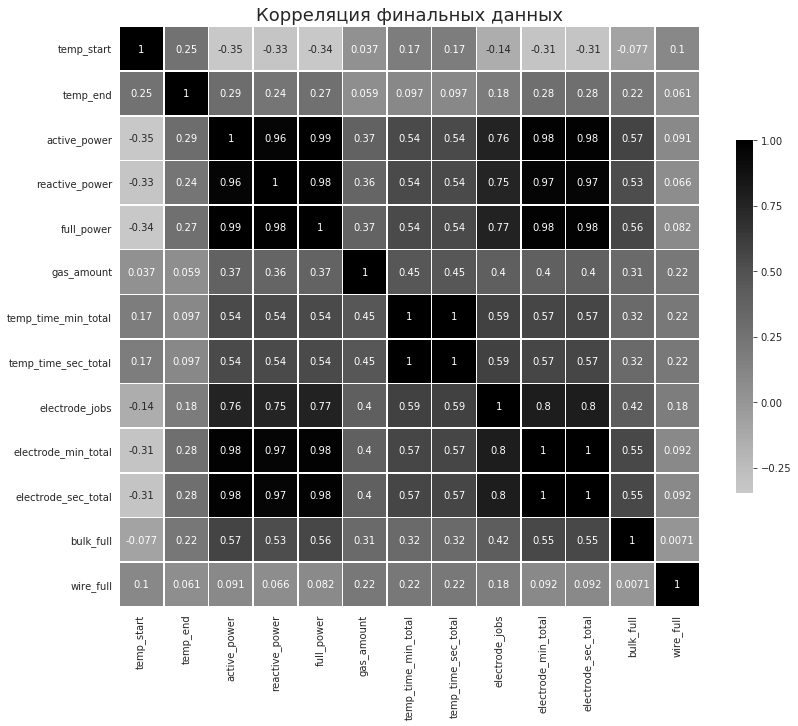

In [92]:
plt.figure(figsize=(13,13))

sns.heatmap(corr, center=0, annot=True, cmap='Greys',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Корреляция финальных данных', size=18);

На финальную температуру заметно влияют затраченная мощность, длительность работы электродов и начальная температура. Что, в целом, логично.   
Корреляция не обнаружена между финальной температурой и тремя признаками: временем между замерами температуры, объемом инертного газа и количеством потраченной проволоки.

Данные готовы для машинного обучения. Составляем выводы и обучаем модели.  

---

### Вывод <a class='anchor' id='0430'></a>

Провели этап подготовки данных.

Удалили заметный выброс мощности, очистили температуру от ненужных записей, перевели количество сыпучих добавок и затраченной проволоки в суммарный объем. Перевели данные в удобный вид.  
Добавили три новые фичи: полная мощность, время работы электродов, количество включений электродов.  

Соединили таблицы в один датасет df_full.  
Замечены корреляции между целевым признаком и параметрами работы электродов. Количество добавок и газа практически не влияет на изменение финальной температуры.  

Переходим к машинному обучению.  

---

## Машинное обучение <a class='anchor' id='0500'></a>  

Финальные данные содержат 2329 записей. Мы будем использовать две выборки: обучающую и тестовую. Валидация будет проводиться кросс-валом на обучающих данных.

### Настройка  признаков и параметров <a class='anchor' id='0510'></a>

Устанавливаем random state.

In [93]:
SEED = 42

При первом приближении отбросим значения времени в секундах.

In [94]:
df_full_min = df_full.drop(['electrode_sec_total', 'temp_time_sec_total'], axis=1)

df_full_min.head()

,key,temp_start,temp_end,active_power,reactive_power,full_power,gas_amount,temp_time_min_total,electrode_jobs,electrode_min_total,bulk_full,wire_full
0,1,1571,1613,4.878147,3.183241,5.826395,29.749986,14.350,5,18.300,553.0,60.059998
1,2,1581,1602,3.052598,1.998112,3.649216,12.555561,21.750,4,13.517,582.0,96.052315
2,3,1596,1599,2.525882,1.599076,2.989534,28.554793,21.667,5,10.917,544.0,91.160157
3,4,1601,1625,3.209250,2.060298,3.814962,18.841219,6.467,4,12.350,595.0,89.063515
4,5,1576,1602,3.347173,2.252643,4.035758,5.413692,12.700,4,14.483,584.0,98.352796


Разбиваем сет на признаки и целевой признак. Создаем обучающую и тестовые выборки.

In [95]:
features = df_full_min.drop(['key','temp_end'], axis=1)
target = df_full_min['temp_end']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=SEED)

In [97]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1863, 10) (466, 10) (1863,) (466,)


Гуд, данные готовы.  

---

Создадим функции автоматизации. Начнем с поиска гиперпараметров.

In [98]:
def grid_search(model, params, feat, targ):
      
    search = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
    search.fit(feat, targ)
    
    print(search.best_score_)
    print(search.best_params_)

Подсчет скоринга на кросс-валидации.

In [99]:
def cv_score(model, feat, targ):
    
    score = cross_val_score(model, feat, targ, cv=5, scoring='neg_mean_absolute_error')
    
    print('Результат кросс валидации', score)
    print('Усредненный результат', score.mean().round(3))

Предикт и подсчет МАЕ.

In [100]:
def prediction_train(model, train_feat, train_targ): 
    
    mae_train = mean_absolute_error(train_targ, model.predict(train_feat)) 
    print('MAE на обучающей выборке', mae_train.round(3))
    
def prediction_test(model, test_feat, test_targ):
    
    mae_test = mean_absolute_error(test_targ, model.predict(test_feat))
    print('MAE на тестовой выборке', mae_test.round(3))

### Проверка модели на адекватность <a class='anchor' id='0520'></a>

Обучим дамми модельку предсказывать медианные значения температуры и посмотрим на ее метрики.

In [101]:
dummy = DummyRegressor(strategy="median")
dummy.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [102]:
prediction_train(dummy, X_train, y_train)

MAE на обучающей выборке 8.035


In [103]:
%%time
prediction_test(dummy, X_test, y_test)

MAE на тестовой выборке 8.105
CPU times: user 1.43 ms, sys: 0 ns, total: 1.43 ms
Wall time: 1.1 ms


Хмммм, с этой моделькой можно получить 4 sp. Сделаю задание в peergrade и защищу финальный проект.  

Если дамми дала такой результат, значит, мы движемся в верном направлении. 

Посмотрим на нормальные модели.

### Подбор моделей <a class='anchor' id='0530'></a>

Создадим заготовку для результатов.  

Добавим время обучения и предсказания для возможного включение модели в работу в реальном времени.

**Важно** 

При перезапуске ноутбука время обучения и предсказания немного меняется. В таблицу вставлены первичные значения.

In [104]:
results = pd.DataFrame(columns=['model','time_learn, ms','time_predict, ms','mae_train','mae_test'])
results

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test


Напишем функцию обновления таблицы.

In [105]:
def results_upd_train(row, model, time_learn, mae_train):
    
    results.loc[row, 'model'] = model
    results.loc[row, 'time_learn, ms'] = time_learn
    results.loc[row, 'mae_train'] = mae_train
    
    display(results)
    
def results_upd_test(row, time_pred, mae_test):
    
    results.loc[row, 'time_predict, ms'] = time_pred
    results.loc[row, 'mae_test'] = mae_test
    
    display(results)

---

#### Линейная регрессия  

Начнем с простого. Параметры особо не настроить. Сразу предскажем результаты.

In [106]:
lr = LinearRegression(n_jobs=-1)

In [107]:
%%time
lr.fit(X_train, y_train)

CPU times: user 4.03 ms, sys: 0 ns, total: 4.03 ms
Wall time: 2.93 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [108]:
cv_score(lr, X_train, y_train)

Результат кросс валидации [-7.19562743 -6.8581877  -7.16631214 -6.25189572 -6.00101232]
Усредненный результат -6.695


Это уже близко к 5 sp. Смотрим предсказания.

In [109]:
prediction_train(lr, X_train, y_train)

MAE на обучающей выборке 6.606


In [110]:
results_upd_train(0, 'Linear Regression', 5.05, 6.606)

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test
0,Linear Regression,5.05,NaN,6.606,NaN


---

#### Random Forest Regressor <a class='anchor' id='param_search'></a>

Посмотрим, как сработает лес. Ожидаю увеличение времени обучения и предсказания.

*Искать гридсерчем - реально долго, закомментил строки ниже и привел код. Просто показать, что могу/умею*.  

In [111]:
rfr = RandomForestRegressor(random_state=SEED, n_jobs=-1)

rfr_params = dict(n_estimators=[100,200,300,400,500],
                  max_depth=[3,5,7,9],
                  criterion=['mae','mse'])

In [112]:
#grid_search(rfr, rfr_params, X_train, y_train)

Обучаем модель на лучших параметрах.

In [113]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=9, criterion='mae', random_state=SEED, n_jobs=-1)

In [114]:
%%time
rfr.fit(X_train, y_train)

CPU times: user 1min 5s, sys: 79.5 ms, total: 1min 5s
Wall time: 1min 6s


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

32 секунды обучения! 

Посмотрим на валидацию.

In [115]:
#cv_score(rfr, X_train, y_train)

Результат кросс валидации [-6.75172654 -6.26368097 -6.55174531 -5.80144624 -6.03571237]  
Усредненный результат -6.281

Смотрим на МАЕ на обучающей выборке.

In [116]:
%%time
prediction_train(rfr, X_train, y_train)

MAE на обучающей выборке 4.182
CPU times: user 143 ms, sys: 42 µs, total: 143 ms
Wall time: 150 ms


Окей, заполняем табличку результатов.

In [117]:
results_upd_train(1, 'Random Foresr', 32000, 4.182)

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test
0,Linear Regression,5.05,NaN,6.606,NaN
1,Random Foresr,32000,NaN,4.182,NaN


--- 

#### Gradient Boosting Regregressor

Посмотрим, что сможет градиентный буст от sklearn. Проведем поиск параметров в два этапа: на первом найдем лучшее количесто итераций, на второй остальные параметры.

In [118]:
gbr_1 = GradientBoostingRegressor(random_state=SEED, learning_rate=0.01)

gbr_params_1 = dict(n_estimators=[100,300,500,600])

gbr_params_2 = dict(max_depth=[5,7,9],
                    subsample=[0.9, 0.8, 0.7])

In [119]:
#grid_search(gbr_1, gbr_params_1, X_train, y_train)

-6.363622804646349  
{'n_estimators': 600}

In [120]:
gbr_2 = GradientBoostingRegressor(n_estimators=600, random_state=SEED)

In [121]:
#grid_search(gbr_2, gbr_params_2, X_train, y_train)

-6.3090270778334885  
{'max_depth': 5, 'subsample': 0.9}

In [122]:
gbr_3 = GradientBoostingRegressor(n_estimators=600, learning_rate=0.01, max_depth=5, subsample=0.9, random_state=SEED)

In [123]:
%%time
gbr_3.fit(X_train, y_train)

CPU times: user 2.21 s, sys: 3.89 ms, total: 2.21 s
Wall time: 2.24 s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Быстрое время обучение. Посмотрим на валидацию.

In [124]:
cv_score(gbr_3, X_train, y_train)

Результат кросс валидации [-6.63918346 -5.92184209 -6.32843569 -5.72762826 -5.97684702]
Усредненный результат -6.119


In [125]:
%%time
prediction_train(gbr_3, X_train, y_train)

MAE на обучающей выборке 3.862
CPU times: user 41.8 ms, sys: 23 µs, total: 41.9 ms
Wall time: 40.3 ms


Очень даже неплохо. Обновляем таблицу.  

In [126]:
results_upd_train(2, 'Gradient Boosting', 4890, 3.862)

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test
0,Linear Regression,5.05,NaN,6.606,NaN
1,Random Foresr,32000,NaN,4.182,NaN
2,Gradient Boosting,4890,NaN,3.862,NaN


---

#### CatBoost 

Посмотрим, как справится кошачий бустинг.  
Cоздадим специальный пул и кросс-валидацию.    

*hyperopt не крутил. По 5 соревнованиям на каггле понял быстрый алгоритм поиска параметров в ручном режиме. Сначала подкручиваю количество итераций с lr == 0.01. Далее смотрю на глубину, сабсемплы и grow_policy. Depthwise, который обычно позволяет достичь лучших показателей, здесь не сработал. Лучшие параметры представлены ниже.*

In [127]:
ctb_pool = Pool(X_train, label=y_train)

ctb_params = {
    'learning_rate': 0.02,
    'max_depth': 8,
    'n_estimators': 2000,
    'subsample': 0.7, 
    'loss_function': "MAE",
    'early_stopping_rounds' : 10,
    'random_seed':SEED, 
    'verbose':100
}

In [128]:
#scores = cv(ctb_pool,
#            ctb_params,
#            fold_count=2,
#            seed=SEED,
#            plot="True")

Результат кросс валидации на скриншоте.
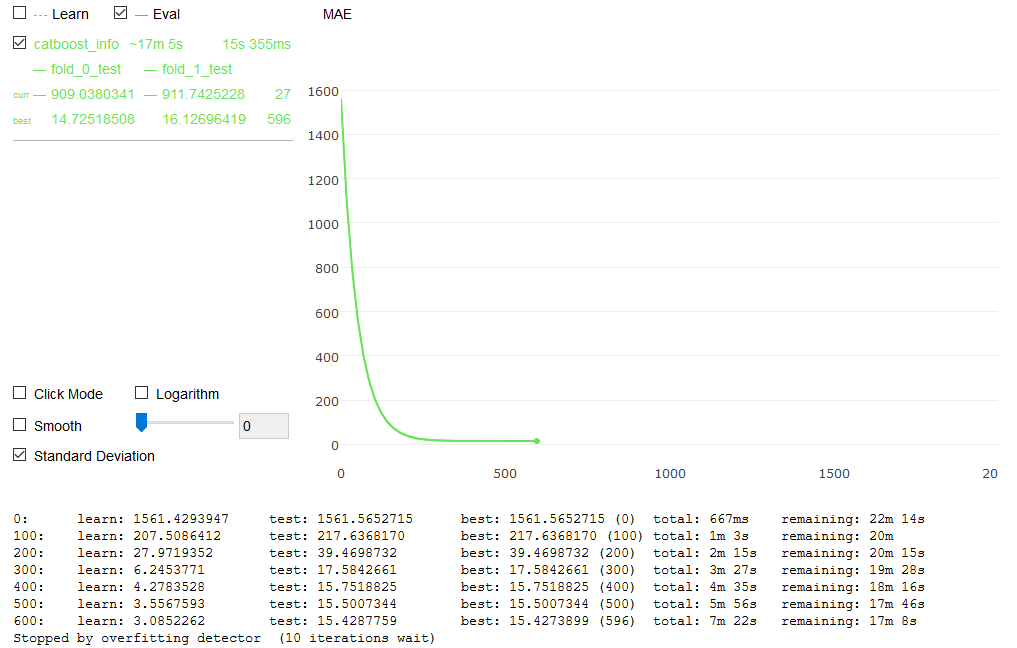

МАЕ = 15 - плохо. Посмотрим, что покажет на трейне и тесте.

In [129]:
catboost = CatBoostRegressor(
                          iterations=2000, 
                          depth=8, 
                          learning_rate=0.02, 
                          loss_function='MAE', 
                          subsample=0.7,                     
                          verbose=0, 
                          random_seed=SEED)

In [130]:
%%time
catboost.fit(X_train, y_train)

CPU times: user 59.5 s, sys: 5.88 s, total: 1min 5s
Wall time: 1min 7s


In [131]:
%%time
prediction_train(catboost, X_train, y_train)

MAE на обучающей выборке 1.839
CPU times: user 24.2 ms, sys: 4.68 ms, total: 28.9 ms
Wall time: 13.5 ms


Скорее всего, перед нами очень сильное переобучение и надо тестить другие фичи. Рабочая модель есть.  
Оставим кошачий буст пока в обойме.

In [132]:
results_upd_train(3, 'CatBoost', 22800, 1.811)

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test
0,Linear Regression,5.05,NaN,6.606,NaN
1,Random Foresr,32000,NaN,4.182,NaN
2,Gradient Boosting,4890,NaN,3.862,NaN
3,CatBoost,22800,NaN,1.811,NaN


Модели обучены и валидированы. Перейдем к тестам. 

В реальной работе я бы оставил только лучшую - градиентный бустинг. Сегодня протестируем все, чтобы составить общую картину.

---

### Тестирование моделей <a class='anchor' id='0540'></a>

#### Линейная регрессия 

In [133]:
%%time
prediction_test(lr, X_test, y_test)

MAE на тестовой выборке 6.478
CPU times: user 3.35 ms, sys: 0 ns, total: 3.35 ms
Wall time: 2.92 ms


Близко, но с таким МАЕ 6 баллов мы не получим.   
Двигаемся дальше.

In [134]:
results_upd_test(0, 0, 6.478)

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test
0,Linear Regression,5.05,0,6.606,6.478
1,Random Foresr,32000,NaN,4.182,NaN
2,Gradient Boosting,4890,NaN,3.862,NaN
3,CatBoost,22800,NaN,1.811,NaN


#### Случайный лес

In [135]:
%%time
prediction_test(rfr, X_test, y_test)

MAE на тестовой выборке 6.084
CPU times: user 78.6 ms, sys: 67 µs, total: 78.7 ms
Wall time: 77.3 ms


Хорошо, но не 6!!! Сильно увеличилось время в сравнении с регрессией.

In [136]:
results_upd_test(1, 238, 6.084)

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test
0,Linear Regression,5.05,0,6.606,6.478
1,Random Foresr,32000,238,4.182,6.084
2,Gradient Boosting,4890,NaN,3.862,NaN
3,CatBoost,22800,NaN,1.811,NaN


#### Gradient Boosting

In [137]:
%%time
prediction_test(gbr_3, X_test, y_test)

MAE на тестовой выборке 5.871
CPU times: user 15.5 ms, sys: 119 µs, total: 15.6 ms
Wall time: 14.6 ms


Бинго! И хорошое время работы.

In [138]:
results_upd_test(2, 37.7, 5.871)

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test
0,Linear Regression,5.05,0,6.606,6.478
1,Random Foresr,32000,238,4.182,6.084
2,Gradient Boosting,4890,37.7,3.862,5.871
3,CatBoost,22800,NaN,1.811,NaN


#### CatBoost

In [139]:
%%time
prediction_test(catboost, X_test, y_test)

MAE на тестовой выборке 5.954
CPU times: user 10 ms, sys: 4.48 ms, total: 14.5 ms
Wall time: 45.1 ms


Катбуст вошел в показатель МАЕ. Время предсказания лучше, чем модели выше. 

In [140]:
results_upd_test(3, 15.6, 5.932)

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test
0,Linear Regression,5.05,0,6.606,6.478
1,Random Foresr,32000,238,4.182,6.084
2,Gradient Boosting,4890,37.7,3.862,5.871
3,CatBoost,22800,15.6,1.811,5.932


In [141]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 5 columns):
model               4 non-null object
time_learn, ms      4 non-null object
time_predict, ms    4 non-null object
mae_train           4 non-null object
mae_test            4 non-null object
dtypes: object(5)
memory usage: 352.0+ bytes


Результаты представлю ниже.

In [142]:
def highlight_background(s):
    return ['background-color: green' if v <= 6.0 else 'background-color: goldenrod' for v in s]

def color_text(val):
    color = 'black' if val == 'yes' else 'white'
    return 'color: %s' % color


results_final = results.copy()

results_final = results_final.\
                    style.\
                    applymap(color_text, subset='mae_test').\
                    apply(highlight_background, subset='mae_test')

results_final

,model,"time_learn, ms","time_predict, ms",mae_train,mae_test
0,Linear Regression,5.05,0,6.606,6.478
1,Random Foresr,32000,238,4.182,6.084
2,Gradient Boosting,4890,37.7,3.862,5.871
3,CatBoost,22800,15.6,1.811,5.932


И еще немного графиков в завершение работы.

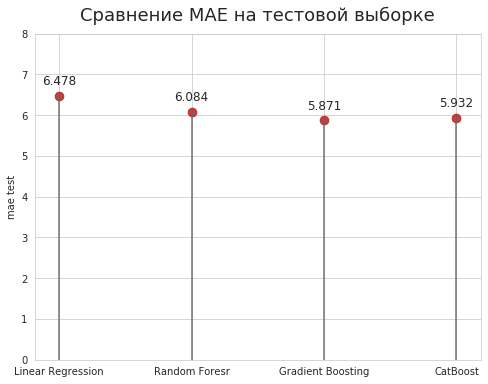

In [143]:
fig, ax = plt.subplots(figsize=(8,6))

ax.vlines(x=results['model'], ymin=0, ymax=results['mae_test'], color='dimgrey', alpha=0.7, linewidth=2)
ax.scatter(x=results['model'], y=results['mae_test'], s=75, color='firebrick', alpha=0.85)


for row in results.itertuples():
    ax.text(row.model, row.mae_test+0.2, s=row.mae_test,
            horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)


ax.set_title('Сравнение МАЕ на тестовой выборке', size=18, y=(1.02))
ax.set_ylabel('mae test')
ax.set_ylim(0,8)
ax.set_xticks(results['model'])
ax.set_xticklabels(results['model'], rotation=0, fontdict={'horizontalalignment': 'center', 'size':10})


plt.show()

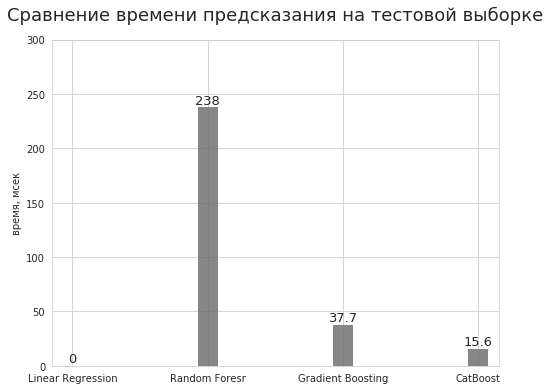

In [144]:
results = results.rename(columns={'time_predict, ms':'time_predict'})

fig, ax = plt.subplots(figsize=(8,6))

ax.vlines(x=results['model'], ymin=0, ymax=results['time_predict'], color='dimgrey', alpha=0.8, linewidth=20)


for row in results.itertuples():
    ax.text(row.model, row.time_predict+0.2, s=row.time_predict,
            horizontalalignment= 'center', verticalalignment='bottom', fontsize=13)


ax.set_title('Сравнение времени предсказания на тестовой выборке', size=18, y=(1.04))
ax.set_ylabel('время, мсек')
ax.set_ylim(0,300)
ax.set_xticks(results['model'])
ax.set_xticklabels(results['model'], rotation=0, fontdict={'horizontalalignment': 'center', 'size':10})


plt.show()

Три модели из четырех показали значение близкие или равные эталону.  
В дальнейшем в продакшн рекомендую GradientBoosting и CatBoost.  

Уверен, что можно еще улучшить метрики, поиграв с фичами. Но на данном этапе завершаю исследования, достигнув требуемого уровня метрик. 

### Вывод <a class='anchor' id='0550'></a>

На данном этапе было протестировано 5 моделей: дамми болванка, линейная регрессия, случайный лес, градиентный бустинг и катбуст. 

Лес, бустинг и кошка показали метрику МАЕ в районе 6 пунктов на кросс валидации. 
На тестовой выборке эти модели показали результаты = 6.087, 5.871 и 5.932, соотвественно.  

Удалось достигнуть эталона порога МАЕ задания и получить модели с допустимым временем предсказания.   
Рекомендую запускать модели в прод. Продолжаю поиск возможностей улучшения регрессоров. 

---

## Финальный отчет <a class='anchor' id='0600'></a>

#### Привожу список вопросов для финального отчета.
    
Какие пункты плана были выполнены, а какие — нет (поясните почему)?  
Какие трудности возникли и как вы их преодолели?  
Какие ключевые шаги в решении задачи выделили?  
Какая ваша итоговая модель и какое у неё качество?  

### Анализ выполнения плана <a class='anchor' id='0610'></a>

Первоначальный план был следующим:

*1. Предобработка данных*  
Перевод даты в datetime формат, обработка выбросов (Реактивная мощность, сыпучие вещества, инетный газ), заполнение пропусков при необходимости). Решить вопрос о недостающих данных после общения с Тимлидом (найти, удалить, заполнить)

*2. Подбор необходимых фич*  
Нужны ли нам все столбцы Bulk и Wire, В бОльшую часть сплавов добавляют лишь некоторые. Необходимо определиться с группировкой по времени - нужна ли она.

*3. Объединение данных в одну таблицу*  
Выделение целевого и учебных признаков. Скалирование данных при необходимости.

*4. Подбор и обучение моделей*  
Тестирование дамми болванки, деление сета на 3 выборки, подбор гиперпараметров и валидация моделей.

*5. Выбор и тестирование финальной модели*  
Проверка модели на тестовой выборке. Описание результатов.


В целом структура плана была сохранена. Я соединил два пункта в один: подбор фич и объединение данных. Это никак не повлияло на финальный результат.
За время обучения мы научились правильно выстраивать план работы. В финальном проекте я применил все полученные навыки.

Выбросы, кроме одного значения реактивной мощности, я не удалял и не менял. Отклоняющиеся значения были обусловлены технологическим процессом, а не ошибками измерений. Я пытался построить модель, максимально приближенную к реальным условиям.  
Таблицы bulk и wire не имели корреляции с финальной температурой, но остались в финальной версии обучающих данных.

Финальный план работы лег в основу оглавления тетради.

---

### Трудности проекта <a class='anchor' id='0620'></a>

**1. Постановка задачи и первичная обработка данных**  

Я провел анализ и собрал все вопросы в отдельный блок. Консультация ТимЛида дала на все ответы. Благодарю за понятные и полные комментарии.  

**2. Найти первую и финальную измеренную температуру**

Классика - я могу решать сложные задачи и разбирать работу нейросетей в pytorch, а простые вещи вгоняют в ступор. Часа два придумывал красивое решение задачи. Результатом работы стал [этот код](#temperature).  

**В остальном**  
Сам проект был достаточно легким. Спасибо коллективу Практикума за знания и практику.  

---

### Ключевые шаги решения  <a class='anchor' id='0630'></a>

**1. Разумная постановка задачи**  

Сначала продумать и прописать - что и как считать, затем уже писать код. В противном случае, мысли могут уйти в сторону. 

**2. Качественная предобработка данных**  

Оставлять или удалять выбросы. Какие фичи добавить и сгенерировать. Скалировать ли данные. Как обрабатывать пропуски. 
Все эти пункты влияют на качество работы модели.  
В этом проекте я оставил данные практически в исходном виде. Повторю, что не видел смысла обрабатывать выбросы, потому что они являлись следствием технологического процесса. Согласен с ревьюером Николаем, что в реальной работе можно глубже разбирать выбросы и выяснять причину.  

**3. Читаемый код и подробные комментарии**

Работа в международных компаниях научила меня скурпулезному подходу к оформлению документов. Считаю ноутбук отчасти технологической документацией. Понятное, доступное и правильное оформление позволяет легко понимать условие и выполнять задачу.  
В понятном коде легко искать ошибки. Комментарии помогают мне лучше увидеть задачу, а тем, кто читает код - вникнуть в особенности.  
Каггл научил меня структурировать код. Например, после проведенного машинного обучения надо изменить набор фич или доработать выбросы. При аккуратном оформлении кода ты тратишь гораздо меньше времени на поиск нужного места. А разбивка шагов по нескольким ячейкам позволяет изменять некоторые переменные без преобразования больших массивов данных.  

**4. Машинное обучение и подбор гиперпараметров**

Сложные модели не всегда лучше простых решений. Даже в этой задаче, более продвинуй CatBoost показал худшую оценку, чем GradientBoosting из sklearn. Понимаю, что можно докрутить фичи и улучшить прогноз кошачьего регрессора.
[В коде указал](#param_search), что не всегда удобно искать параметры классическим поиском по кросс валидации. Для этого проекта подобрал гиперы двух моделей руками быстрее, основываясь на опыте из прочитанных по ML книг.  

**5. Конкретные шаги проекта**

Чем лучше данные, тем качественнее работает модель. Ключевым шагом этой работы стало создание df_full. Сборного датасета с финальными фичами, на котором обучались модели. Удалось достичь метрики МАЕ < 6 пунктов на тестовой выборке. Считаю, что можно подтянуть это значение в дальнейшем до ~4.5 

---

### Итоговая модель <a class='anchor' id='0640'></a>

Gradient Boosting Regressor из библиотеки sklearn.  

МАЕ на тестовой выборке = 5.871. Время предсказания = 37.7 мсек.

В первых итерациях ноутбука удавалось достичь метрики 5.7. Благодаря ошибке. Не удалил из df_full значения времени в секундах. Провел работу над ошибками, ухудшил метрику на 0.1, но текущие фичи мне нравятся больше.  

Рекомендую модель в продакшн. Она отвечает требованиям по качеству и скорости работи. Можно следить за температурой в режиме практически реального времени.  

---

### Общий вывод <a class='anchor' id='0650'></a>  

Целью проекта было создание модели для подсчета температуры. Цель успешно выполнена.   
Решены задачи - глубокая предобработка данных, создание новых признаков, машинное обучение.  
Дополнительно изучен процесс плавки металла в аппарате ковш-печь. 

Финальная и рекомендованная модель - Gradient Boosting Regressor, mae тестовой выборки 5.871, время предсказания 37.7 мсек. 

Заключительный штрих - применение feature_importance_


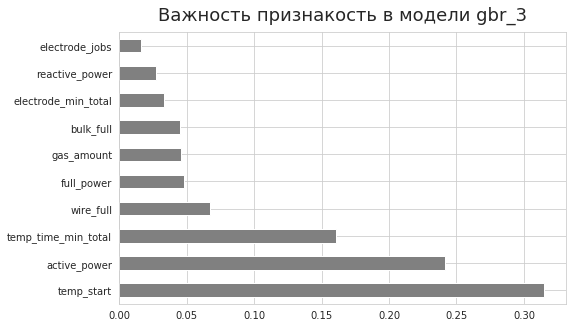

In [145]:
feat_importances = pd.Series(gbr_3.feature_importances_, index=X_train.columns)

plt.figure(figsize=(8,5))
feat_importances.nlargest(20).plot(kind='barh', color='gray')

plt.title('Важность признакость в модели gbr_3', size=18, y=1.02);

Больше остальных на предсказание финальной температуры влияют начальная температура, активная мощность и время между первым и последним замером температуры. Именно в это время происходят добавки присадок и максимальные энергозатраты.  
Меньше всего на финальную температуру влияют количество включений электродов и реактивная мощность. Это логично, ведь по определению она не участвует в процессе.

---

Цели и задачи выполнены. Проект завершен. 

---